# 1 - Perkenalan

**Bab pengenalan harus diisi dengan identitas.**

---------

**Hussein MS | Batch 10 | Phase 1**

------

# 2. Judul/Penanda Soal 

**Soal dan judul problem yang dikerjakan**

------

Objektif : 

+ memahami konsep supervised learning
+ mempersiapkan data untuk digunakan dalam model supervised learning
+ mengimplementasikan supervised learning dengan data yang diberikan
+ melakukan evaluasi model
+ melakukan model tuning

Problem : 

Diberikan sebuah dataset, yang akan dianalisa dan membuat model Machine Learning berdasarkan kebutuhan dataset, yang dimana untuk memprediksi Apakah seseorang akan menerima tawaran untuk membuat term-deposit (Deposito berjangka)

------

# 3. Import Libraries

**Berisi semua library yang digunakan dalam project.**

---

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTEN 
import calendar
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Import library yang dibutuhkan

# 4. Data Loading

**Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.**

---

In [3]:
pd.options.display.max_columns = None

untuk menunjukan semua kolom 

In [5]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';', na_values='unknown')

Import dataset, kita set 'unknown' sebagai null values

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df.shape

(41188, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dataset yang diolah mempunyai bentuk ***41188 Baris dan 21 Kolom*** <br> 
Terdapat *missing value* pada dataset. handling *missing value* diperlukan pada tahap preprocessing

In [9]:
#cek sebarang missing value
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

banyaknya jumlah missing value pada tiap kolom

In [10]:
df_cop = df.copy()

membuat copy dataset yang nantinya akan digunakan dalam proses split train-set

In [11]:
df_cop1 = df_cop.copy()

copy lain dari dataset untuk EDA 

# 5. EDA 

**Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

----

In [12]:
df_cop1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Ubah nama kolom 'y' menjadi kolom 'target'

In [13]:
df_cop1.rename(columns={'y':'target'}, inplace=True)

In [14]:
df_cop.rename(columns={'y':'target'}, inplace=True)

---

In [15]:
df_cop1['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [16]:
edujob_target =df_cop1.groupby(by=['education','job','target']).size().reset_index(name='count')

In [17]:
edujob_target

,education,job,target,count
0,basic.4y,admin.,no,67
1,basic.4y,admin.,yes,10
2,basic.4y,blue-collar,no,2195
3,basic.4y,blue-collar,yes,123
4,basic.4y,entrepreneur,no,130
...,...,...,...,...
136,university.degree,student,yes,35
137,university.degree,technician,no,1584
138,university.degree,technician,yes,225
139,university.degree,unemployed,no,223


In [18]:
edujob = df_cop1.groupby(by=['education'])[['job']].value_counts()

In [19]:
edujob

education          job         
basic.4y           blue-collar     2318
                   retired          597
                   housemaid        474
                   entrepreneur     137
                   services         132
                                   ... 
university.degree  unemployed       262
                   services         173
                   student          170
                   housemaid        139
                   blue-collar       94
Length: 72, dtype: int64

---

##### Basic4y

In [20]:
basic4y = edujob.loc['basic.4y']

In [21]:
figb4y = px.pie(basic4y, values=basic4y.values, names=basic4y.index, color_discrete_sequence=px.colors.sequential.RdBu,
                    title='Sebaran Pekerjaan dari Pendidikan Terakhir "Basic 4y"')
figb4y.update_traces(textposition='outside', textinfo='percent+label') 
figb4y.show()

In [22]:
basic4y_target = edujob_target[edujob_target['education']=='basic.4y']
fig_b4y = px.histogram(basic4y_target, x="job", y="count", color="target", text_auto="label",
                   title="Applicant based on their job and education (basic4y)")
fig_b4y.update_layout(bargap=0.2)
fig_b4y.update_xaxes(categoryorder="total ascending")
fig_b4y.show()

Setelah dilihat dari hasil visualisasi, ternyata sasaran konsumen dari kelompok education *'basic4y'* , majoritynya datang dari mereka yang memiliki pekerjaan sebagai blue-collar(hard manual labor, typically agriculture, manufacturing, construction, mining, or maintenance). Dimana, kurang lebih 90% tawaran yang perusahaan ajukan, **Ditolak**. 

----

##### University Degree

In [23]:
univ = edujob.loc['university.degree']

In [24]:
fig_univ = px.pie(univ, values=univ.values, names=univ.index, color_discrete_sequence=px.colors.sequential.Aggrnyl,
                    title='Sebaran Pekerjaan dari Pendidikan Terakhir "University Degree"')
fig_univ.update_traces(textposition='outside', textinfo='percent+label')  
fig_univ.show()

In [25]:
univ_target = edujob_target[edujob_target['education']=='university.degree']
fig_uni = px.histogram(univ_target, x="job", y="count", color="target", text_auto="label",
                   title="Applicant based on their job and education (univ)")
fig_uni.update_layout(bargap=0.2)
fig_uni.update_xaxes(categoryorder="total ascending")
fig_uni.show()

Ternyata dari kelompok education University degreepun tidak jauh berbeda, Majority terbesar datang dari mereka yang memiliki pekerjaan sebagai admin. Dimana, kurang lebih hanya 20% pemohon yang perusahaan tawarkan, **Diterima**. 

---

##### Profesional Course

In [26]:
pc = edujob.loc['professional.course']

In [27]:
figpc = px.pie(pc, values=pc.values, names=pc.index, color_discrete_sequence=px.colors.sequential.Sunsetdark,
                    title='Sebaran Pekerjaan dari Pendidikan Terakhir "Professional Course"')
figpc.update_traces(textposition='outside', textinfo='percent+label')                    
figpc.show()

In [28]:
pc_target = edujob_target[edujob_target['education']=='professional.course']
figpc = px.histogram(pc_target, x="job", y="count", color="target", text_auto="label",
                   title="Applicant based on their job and education (Professional Course)")
figpc.update_layout(bargap=0.2)
figpc.update_xaxes(categoryorder="total ascending")
figpc.show()

Untuk Professional juga tidak jauh beda. Perbandingan antara penawaran yang Ditolak dan Diterimanya pun masih terlampau jauh. Bisa dikatakan, mungkin hanya 15% yang menerima tawaran dari perusahaan untuk jasa term-deposit.

Setelah sedikit melakukan sampling kolom edukasi dan job terhadap target, bisa kita simpulkan bahwa, Pekerjaan/Edukasi jenis apapun memiliki Rate Acceptance yang sangat kecil. 

Dari sedikit analisa sampling yang sudah dilakukan diatas, dapat kita ketahui, ternyata perhitungan prediksi 'target' tidak hanya berdasarkan jenis pekerjaan dan edukasi. namun ada faktor lain, yang menyebabkan sesorang akhirnya memutuskan untuk menerima tawaran term-deposit.

----

##### datemonth changing

Kita ubah kolom yang mengandung *date* dari *string* type menjadi *Date* type agar lebih mudah untuk diolah apabila nanti akan diolah.

In [29]:
df_cop1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df_cop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
df_cop1['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [32]:
df_cop1['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [33]:
df_cop1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [34]:
month = {'may': 5, 'jul': 7, 'aug' : 8 ,'jun' : 6 ,    'nov':11 ,    'apr':4   ,  'oct' : 10   ,   'sep' : 9  ,  'mar' : 3  ,  'dec' : 12}
days = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}

In [35]:
df_cop1['month'] = df_cop1['month'].map(month)

In [36]:
df_cop1['day_of_week'] = df_cop1['day_of_week'].map(days)

In [37]:
df_cop1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,5,0,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,0,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,0,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,0,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,4,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,4,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,11,4,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,11,4,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [38]:
df_cop1['month'] = df_cop1['month'].apply(lambda x: calendar.month_abbr[x])

In [39]:
df_cop1['day_of_week'] = df_cop1['day_of_week'].apply(lambda w: calendar.day_name[w])

In [40]:
df_cop1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Monday,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,May,Monday,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,May,Monday,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,May,Monday,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,May,Monday,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,Nov,Friday,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,Nov,Friday,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,Nov,Friday,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,Nov,Friday,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [41]:
figmon = px.histogram(df_cop1, x="month", 
                   title="Sebaran Record Berdasarkan bulan", color="month",
                   text_auto='.2s')
figmon.update_layout(bargap=0.2)
figmon.update_xaxes(categoryorder="total ascending")
figmon.show()

In [42]:
df_cop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

----

##### cek sebaran usia&marital

In [43]:
df_cop1['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [44]:
agem = df_cop1.groupby(by=['age','marital']).size().reset_index(name='count')

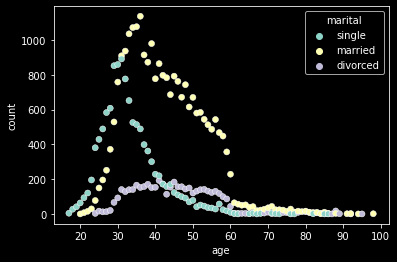

In [45]:
sns.scatterplot(data=agem, x='age', y='count', hue='marital')
plt.show()

---

##### Check pdays

In [2189]:
df_cop['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [2190]:
# cpdays = df_cop[['pdays','y']].where(df_cop['pdays'] == 999)

In [2191]:
cpdays = df_cop1.groupby(by=['pdays','target']).size().reset_index(name='Total record from pdays')

In [2192]:
cpdays

,pdays,target,Total record from pdays
0,0,no,5
1,0,yes,10
2,1,no,18
3,1,yes,8
4,2,no,24
5,2,yes,37
6,3,no,141
7,3,yes,298
8,4,no,55
9,4,yes,63


In [2193]:
cpdays.value_counts()

pdays  target  Total record from pdays
0      no      5                          1
12     yes     26                         1
13     yes     28                         1
14     no      9                          1
       yes     11                         1
15     no      8                          1
       yes     16                         1
16     no      5                          1
       yes     6                          1
17     no      6                          1
       yes     2                          1
18     no      3                          1
       yes     4                          1
19     no      2                          1
       yes     1                          1
20     no      1                          1
21     yes     2                          1
22     no      1                          1
       yes     2                          1
25     yes     1                          1
26     yes     1                          1
27     yes     1                     

In [2194]:
fig_pd = px.histogram(cpdays, x="pdays", y="Total record from pdays", color="pdays", marginal="box",
                   title="Total record from pdays")
fig_pd.update_layout(bargap=0.2)
fig_pd.show()

Setelah dilihat lagi, kolom ini mempunyai sebaran data yang cukup 'Aneh' 

In [2195]:
cpdays1 = df_cop[df_cop['pdays'] == 999 ]['target']

In [2196]:
fig_pd = px.histogram(cpdays1, x="target", color="target", marginal="",
                   title="Total record from pdays = 999")
fig_pd.update_layout(bargap=0.2)
fig_pd.show()

Ternyata, untuk range dimana pdays = 999, hampir semua valuenya ada di no. Hal ini bisa diasumsikan bahwa, jika suatu record mempunyai nilai pdays sebesar 999, ini akan menyebabkan hasil dari 'Target' ditolak. 

----

##### cek media penerima informasi tawaran

In [46]:
df_cop1['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [47]:
telp = df_cop1[df_cop1['contact'] == 'telephone' ][['contact','target']]
cell = df_cop1[df_cop1['contact'] == 'cellular' ][['contact','target']]

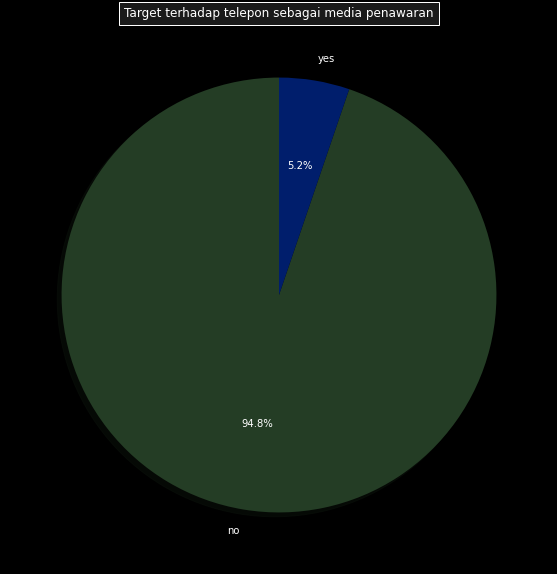

In [48]:
telpc = telp.groupby(by=['contact','target']).size().reset_index(name='Total record from contact')
figtelp, axt = plt.subplots(figsize=(10,10))
plt.pie(telpc['Total record from contact'], labels=telpc['target'], autopct='%1.1f%%', colors=['#243D25', '#001E6C'], shadow=True, startangle=90)
plt.title("Target terhadap telepon sebagai media penawaran", bbox={'facecolor':'0.1', 'pad':5})
plt.show()

Jika melakukan penawaran menggunakan telepon, jawaban dominan yang sering diterima adalah 'Tidak' 

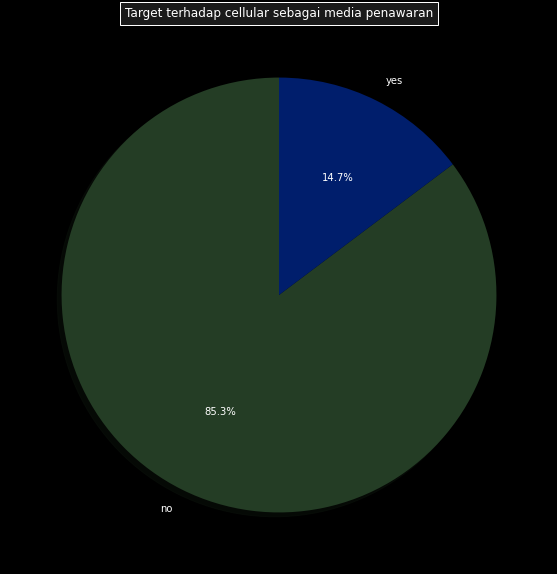

In [49]:
cellc = cell.groupby(by=['contact','target']).size().reset_index(name='Total record from contact')
figcell, axce = plt.subplots(figsize=(10,10))
plt.pie(cellc['Total record from contact'], labels=cellc['target'], autopct='%1.1f%%', colors=['#243D25', '#001E6C'], shadow=True, startangle=90)
plt.title("Target terhadap cellular sebagai media penawaran", bbox={'facecolor':'0.1', 'pad':5})
plt.show()

Jika melakukan penawaran menggunakan cellular, jawaban dominan yang sering diterima adalah 'Tidak' 

Hanya saja, untuk penwaran yang dilakukan menggunakan Cellular, memiliki presentasi **'yes' yang lebih tinggi** dibandingkan Telepon. 

---

In [50]:
age_con = df_cop1.groupby(by=['age','contact','target']).size().reset_index(name='Total record from contact')

In [51]:
age_con_a = age_con[age_con['age'] <= 50 ][['age','contact','Total record from contact']]

In [52]:
age_con_b = age_con[age_con['age'] > 50 ][['age','contact','Total record from contact']]

In [53]:
ag_age = age_con_a.where(age_con_a['contact'] == 'cellular').value_counts()

In [54]:
figagecona = px.bar(data_frame=age_con_a, x="age", y='Total record from contact', color="contact",title='Media penerima tawaran' )
figagecona.update_layout(bargap=0.2)
figagecona.show()

Setelah ditinjau dari media penawararan untuk kelompok usia dibawah 50, **cellular** merupakan **media penerima tawaran terbanyak**, dibandingkan dengan **telephone**. 

In [55]:
figageconb = px.bar(data_frame=age_con_b, x="age", y='Total record from contact', color="contact",title='Media penerima tawaran' )
figageconb.update_layout(bargap=0.2)
figageconb.show()

Setelah ditinjau dari media penawararan untuk kelompok usia diatas 50, **cellular** merupakan **media penerima tawaran terbanyak**, dibandingkan dengan **telephone**. 

Mengapa telephone cellular menjadi tempat untuk menawarkan tawaran dari perusahaan? 

Kemungkinan yang terjadi adalah, dengan anggapan bahwa setiap orang menggunakan cellular, dapat dipastikan bahwa apa yang perusahaan tawarkan pasti akan sampai ke orang yang memiliki cellular, minimal dilihat. Dilain hal, penggunaan telephone(asumsi bahwa telephone yang dimaksud merupakan telephone rumah, karena mungkin jumlah pengguna telepon rumah tidak sebanyak cellular, jadi untuk jumlah penggunanya sendiri lebih sedikit.<br>
Penggunaan cellular dapat diketahui minimal sebaran usianya, dari pengecekan SIM card. selain itu, kerja sama dengan pihak penyedia jasa layanan SIM card juga mempermudah Segmentasi Konsumen. Sehingga, tawaran yang diberikan oleh perusahaan pun dapat lebih terarah. 

----

##### housing&loan

Kita ingin cari tau, apakah yang memiliki pinjaman serta pinjaman rumah, cenderung untuk menerima tawaran term-deposit? 

In [56]:
df_cop1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Monday,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,May,Monday,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,May,Monday,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,May,Monday,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,May,Monday,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,Nov,Friday,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,Nov,Friday,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,Nov,Friday,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,Nov,Friday,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [57]:
housing = df_cop1[df_cop1['housing'] == 'yes'][['housing','target']].value_counts()

In [58]:
housing

housing  target
yes      no        19069
         yes        2507
dtype: int64

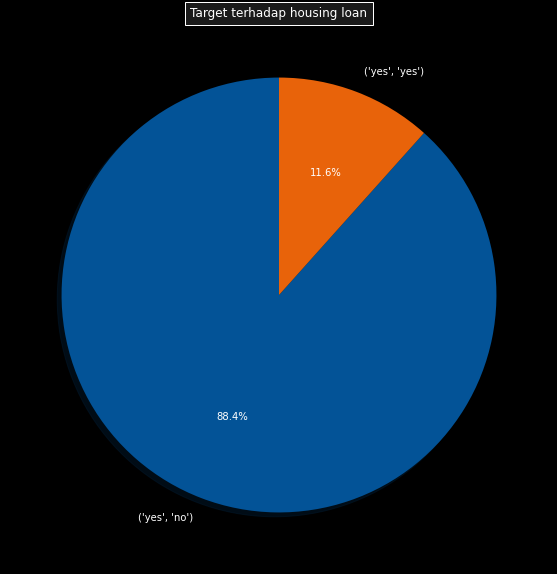

In [59]:
fighous, axh = plt.subplots(figsize=(10,10))
plt.pie(housing, labels=housing.index, autopct='%1.1f%%', colors=['#035397', '#E8630A'], shadow=True, startangle=90)
plt.title("Target terhadap housing loan", bbox={'facecolor':'0.1', 'pad':5})
plt.show()

Ternyata berdasarkan dataset yang ada, jika seseorang memiliki housing loan 'yes' tidak mempengaruhi seseorang tersebut akan lebih tertarik untuk menerima tawaran term-deposit. <br>
Hal ini dibuktikan dengan nilai housing loan 'yes' dan no(target) yang memiliki nilai lebih dominan dibandingkan dengan housing loan 'yes' dan target = 'yes' (menerima tawaran term-deposit)

In [60]:
loan = df_cop1[df_cop1['loan'] == 'yes'][['loan','target']].value_counts()

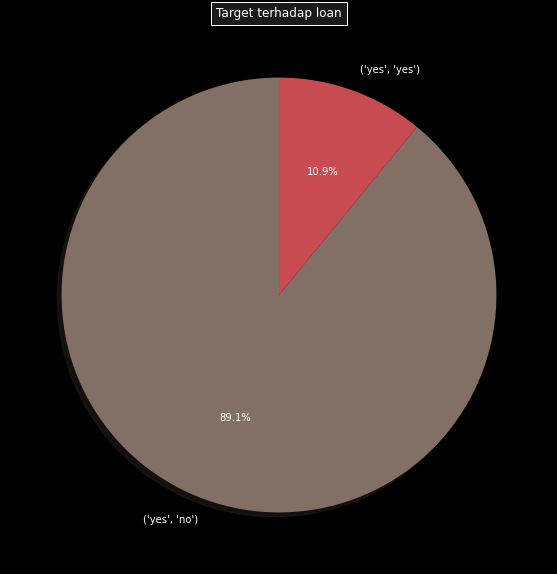

In [61]:
figlo, axl = plt.subplots(figsize=(10,10))
plt.pie(loan, labels=loan.index, autopct='%1.1f%%', colors=['#826F66', '#C74B50'], shadow=True, startangle=90)
plt.title("Target terhadap loan", bbox={'facecolor':'0.1', 'pad':5})
plt.show()

Hal serupa juga terjadi terhadap kolom loan, ternyata jika seseorang memiliki loan 'yes' tidak mempengaruhi seseorang tersebut akan lebih tertarik untuk menerima tawaran term-deposit. <br>
Hal ini dibuktikan dengan nilai loan 'yes' dan no(target) yang memiliki nilai lebih dominan dibandingkan dengan housing loan 'yes' dan target = 'yes' (menerima tawaran term-deposit)

---

konversi kategorikal kolom (yes,no) ke (1,0)

In [62]:
# convert kolom categorical yes&no ke value 1&0
df_cop['target'].replace({'no': 0, 'yes': 1},inplace = True)
df_cop['default'].replace({'no': 0, 'yes': 1},inplace = True)
df_cop['housing'].replace({'no': 0, 'yes': 1},inplace = True)
df_cop['loan'].replace({'no': 0, 'yes': 1},inplace = True)

Karena ada kolom kategori yang ingin kita cek korelasinya, maka kita Labeling ulang untuk Memudahkan proses Analisa, kita ubah makna dari kolom tersebut  

Apabila **NO** kita ubah menjadi nilai 0 

Apabila **YES** Kita ubah menjadi nilai 1 

Perubahan ini tidak mengganti isi dari kolom tersebut, hanya merubah namanya saja agar lebih mudah untuk diolah dan dilihat korelasinya nanti. 

---

In [63]:
num_cols = df_cop.select_dtypes(include=(np.number)).columns.to_list()
obj_cols = df_cop.select_dtypes(include=['object']).columns.to_list()

Kelompokkan data berdasarkan tipe datanya, supaya lebih mudah untuk dianalisa nantinya 

***num_cols untuk kolom dengan data tipe numerik*** 

***obj_cols untuk kolom dengan data tipe object*** 

----

**Cek Central Tendency**

In [64]:
#buat fungsi untuk mencari central tendency
df_cop1n = df_cop[num_cols].mean().rename('mean')
df_cop1ian = df_cop[num_cols].median().rename('median')
df_cop1e = df_cop[num_cols + obj_cols].mode().iloc[0].rename('mode')

Membuat fungsi central tendency untuk dilihat distribusi datanya

----

In [2216]:
#gabungkan fungsi yang telah dibuat ke satu satuan agar mudah dibaca
central_tendency = pd.concat([df_cop1n, df_cop1ian, df_cop1e], axis=1)
central_tendency

,mean,median,mode
age,40.024060,38.000,31.0
default,0.000092,0.000,0.0
housing,0.536743,1.000,1.0
loan,0.155431,0.000,0.0
duration,258.285010,180.000,85
campaign,2.567593,2.000,1.0
pdays,962.475454,999.000,999.0
previous,0.172963,0.000,0.0
emp.var.rate,0.081886,1.100,1.4
cons.price.idx,93.575664,93.749,93.994


Jika dilihat persebarannya di beberapa kolom, Asumsi awal yang akan kita ambil untuk distribusi datanya : 

**age, memiliki distribusi moderatly skew (positive)**<br>

**duration, memiliki moderatly skew (positive)**<br>

**campaign, memiliki moderatly skew (positive)**<br>

**pdays, memiliki moderatly skew (negative)**<br>

**prev, kecenderungan normal** <br>

**emp.var.rate, memiliki moderatly skew (negative)**<br>

**cons.price,idx, kecenderungan normal**<br>

**cons.conf.idx, kecenderungan normal**<br>

**euribor, memiliki moderatly skew (negative)**<br>

**nr.employed, memiliki moderetly skew (negative)** <br>

In [2217]:
df_cop.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,32591.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000092,0.536743,0.155431,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.009594,0.498654,0.362319,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


----

In [2218]:
corr_matrix = df_cop.corr()

Membuat fungsi untuk cek korelasi tiap feature

In [2219]:
df_cop

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


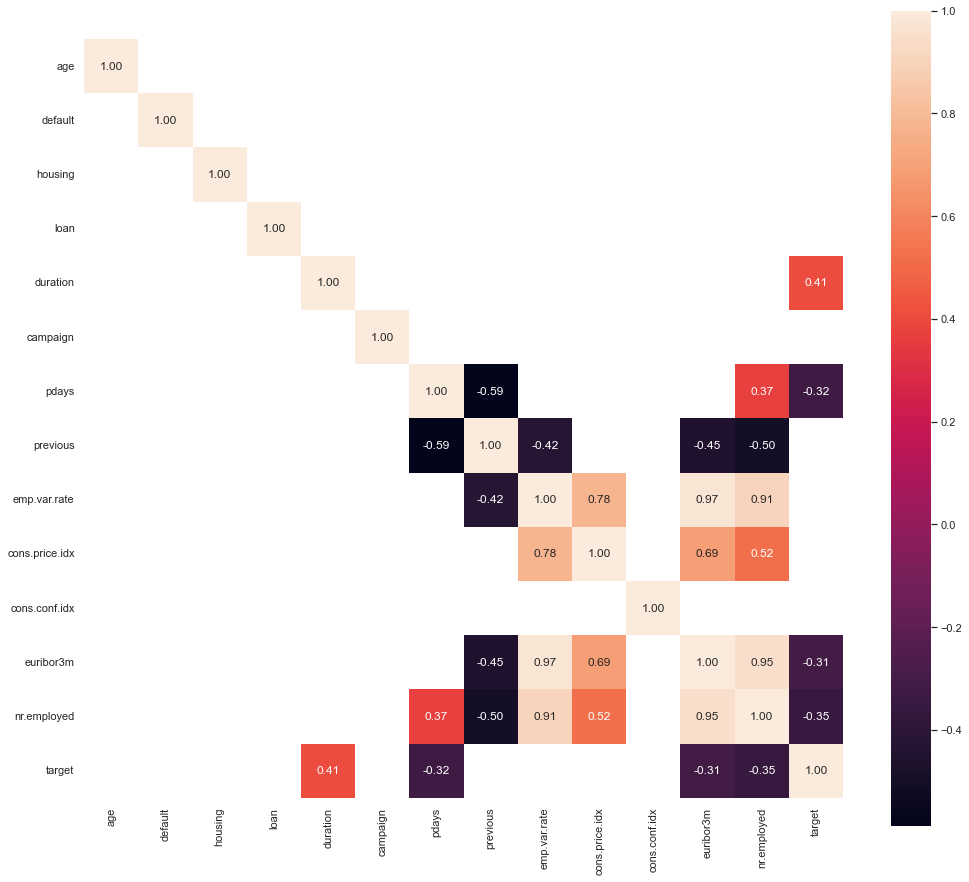

In [2220]:
plt.figure(figsize=(17,15))
axhm = sns.heatmap(corr_matrix[(corr_matrix >= 0.3) | (corr_matrix <= -0.3)], square=True, annot=True, fmt='.2f')
axhm.set_xticklabels(axhm.get_xticklabels(), rotation=90)          
plt.show()

Kita set thresholdnya dari range -1 sampai dengan 1 
Daerah yang muncul angkanya memiliki arti bahwa data tersebut memiliki nilai korelasi antara feature yang sudah di set thresholdnya. 

---

# 6. Data Preprocessing 

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

---

In [2221]:
#membuat data khusus untuk menjadi model inference
data_inf = df_cop.sample(10, random_state=6)
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
7366,42,admin.,single,university.degree,0.0,1.0,0.0,telephone,may,fri,87,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
24750,50,technician,divorced,professional.course,0.0,0.0,0.0,cellular,nov,tue,46,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
33372,29,blue-collar,single,basic.9y,0.0,1.0,0.0,cellular,may,tue,396,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
10680,56,unemployed,divorced,university.degree,NaN,1.0,0.0,telephone,jun,tue,447,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
7879,29,technician,single,NaN,0.0,0.0,0.0,telephone,jun,mon,193,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,0
23420,46,services,married,basic.9y,NaN,1.0,0.0,cellular,aug,wed,59,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
35479,53,technician,divorced,NaN,0.0,1.0,0.0,cellular,may,mon,35,6,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
31861,58,technician,divorced,university.degree,0.0,0.0,0.0,cellular,may,thu,101,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,0
25733,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,nov,wed,64,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
36477,59,retired,married,professional.course,0.0,1.0,0.0,cellular,jun,wed,68,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,0


Ambil record dari dataset yang akan digunakan sebagai model inference 

In [2222]:
#drop index data inf dari dataset yang ada

data_train_test = df_cop.drop(data_inf.index)
data_train_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [2223]:
#reset inde terhadap data train test

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,42,admin.,single,university.degree,0.0,1.0,0.0,telephone,may,fri,87,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
1,50,technician,divorced,professional.course,0.0,0.0,0.0,cellular,nov,tue,46,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
2,29,blue-collar,single,basic.9y,0.0,1.0,0.0,cellular,may,tue,396,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
3,56,unemployed,divorced,university.degree,NaN,1.0,0.0,telephone,jun,tue,447,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
4,29,technician,single,NaN,0.0,0.0,0.0,telephone,jun,mon,193,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,0
5,46,services,married,basic.9y,NaN,1.0,0.0,cellular,aug,wed,59,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
6,53,technician,divorced,NaN,0.0,1.0,0.0,cellular,may,mon,35,6,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
7,58,technician,divorced,university.degree,0.0,0.0,0.0,cellular,may,thu,101,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,0
8,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,nov,wed,64,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
9,59,retired,married,professional.course,0.0,1.0,0.0,cellular,jun,wed,68,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,0


In [2224]:
# Split between X (features) and y (target)

X = data_train_test.drop('target', axis=1)
y = data_train_test['target']
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41173,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41174,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41175,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41176,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


**Split dataset**

*X merupakan feature yang akan kita gunakan untuk training (sebelum feature selection)*

*y merupakan target*

----

In [2225]:
#split train-set dan test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (32942, 20)
Test Size  :  (8236, 20)


Stratify akan membalance kan proporsi kelas yang diberikan. Misalnya, jika variabel y adalah variabel kategoris biner dengan nilai 0 dan 1, jika ada 25% dari 0 dan 75% dari 1, stratify akan memastikan bahwa pemisahan acak memiliki 25% yg 0 dan 75% yg 1.

**Kita gunakan 80/20 sebagai pembagi train-test set. random state kita isikan acak.** 

----

## Data Outlier

In [2226]:
num_column = X_train.select_dtypes(include=(np.number)).columns.to_list()
obj_column = X_train.select_dtypes(include=['object']).columns.to_list()

Kita akan kelompokan Train yang memiliki Numerik dan Objek sebagai tipe datanya

In [2227]:
num_column_test = X_test.select_dtypes(include=(np.number)).columns.to_list()
obj_column_test = X_test.select_dtypes(include=['object']).columns.to_list()

Kita akan kelompokan Test yang memiliki Numerik dan Objek sebagai tipe datanya

In [2228]:
def diagnostic_plots(df, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title('Boxplot')

    plt.show()
    

Membuat fungsi diagnostik visualisasi untuk melihat sebaran distribusi data

In [2229]:
def skewed_features(X_train, columns):
    for column in columns:
        print(column)
        print('Skew:', X_train[column].skew())
        print()
        if X_train[column].skew() < 0.5 and X_train[column].skew() > -0.5:
            print('Kemungkinan data normal')
        elif X_train[column].skew() < -1 or X_train[column].skew() > 1:
            print('Highly Skewed')
        elif X_train[column].skew() >= -0.5 or X_train[column].skew() <= 0.5:
            print('moderately skewed')
        else:
            print('Skew is zero')
        diagnostic_plots(X_train, column)

Membuat fungsi untuk mengelompokan data yang distribusinya Skew, ataupun Normal

---

**Diagnostik Distribusi Data**

Kita akan lakukan cek distribusi data pada Train-set yang bertipe data Numerik

age
Skew: 0.7823280323102352

moderately skewed


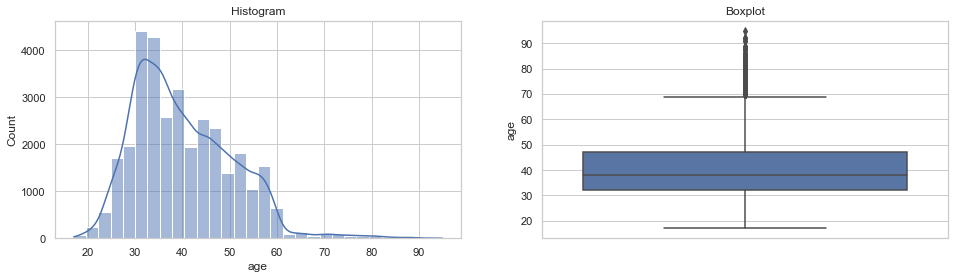

default
Skew: 161.41561262777523

Highly Skewed


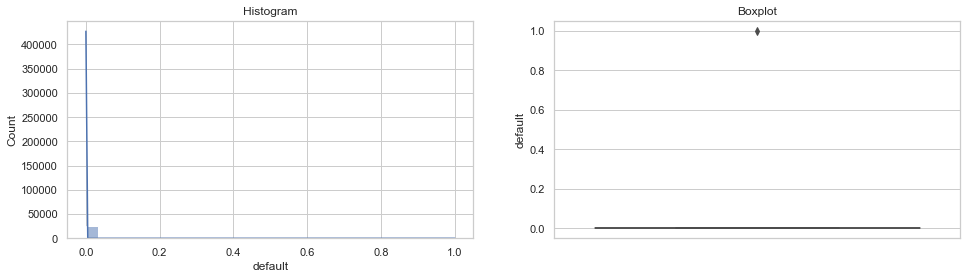

housing
Skew: -0.1392671868559237

Kemungkinan data normal


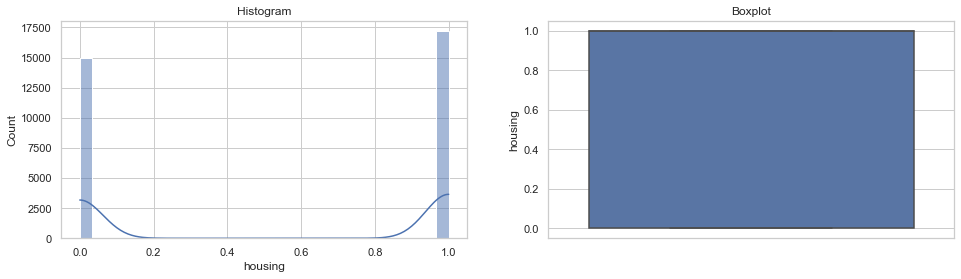

loan
Skew: 1.9036478810569617

Highly Skewed


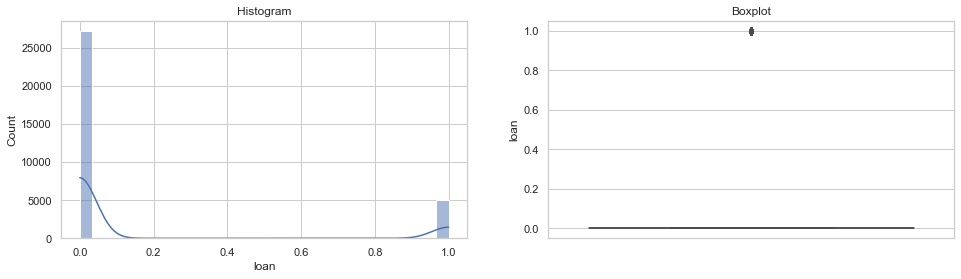

duration
Skew: 3.2781079926308436

Highly Skewed


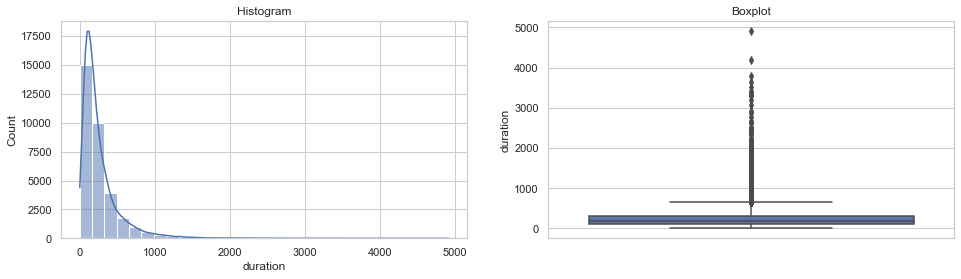

campaign
Skew: 4.7896190043848845

Highly Skewed


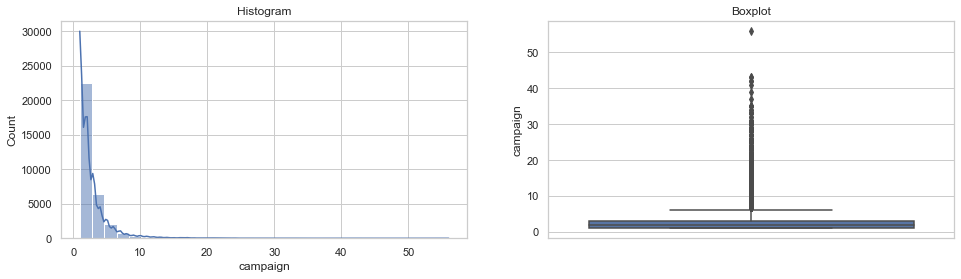

pdays
Skew: -4.979274478324077

Highly Skewed


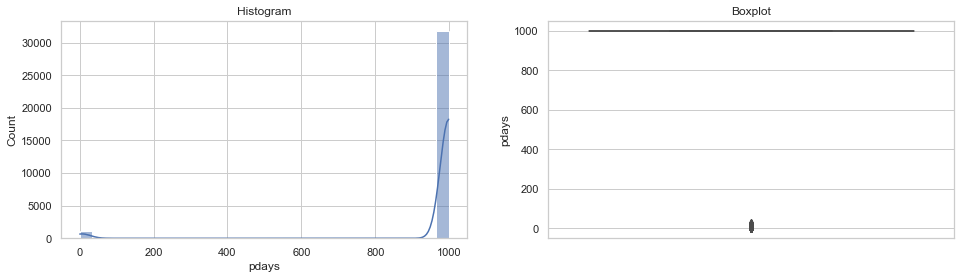

previous
Skew: 3.8464415382987274

Highly Skewed


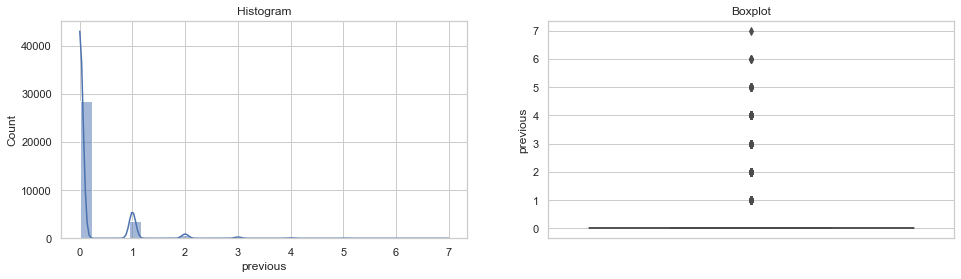

emp.var.rate
Skew: -0.7202874004648685

moderately skewed


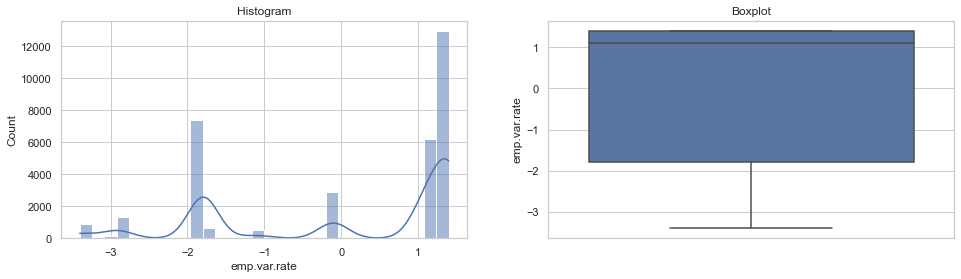

cons.price.idx
Skew: -0.23093692448470599

Kemungkinan data normal


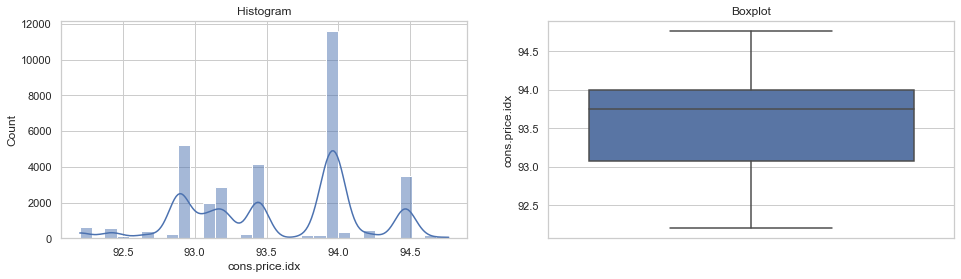

cons.conf.idx
Skew: 0.29993484329079034

Kemungkinan data normal


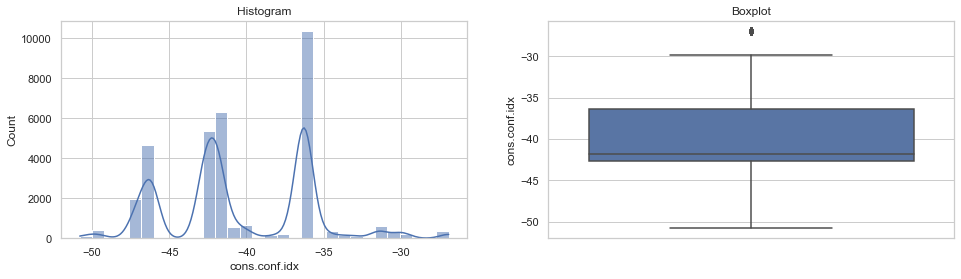

euribor3m
Skew: -0.7034493990639518

moderately skewed


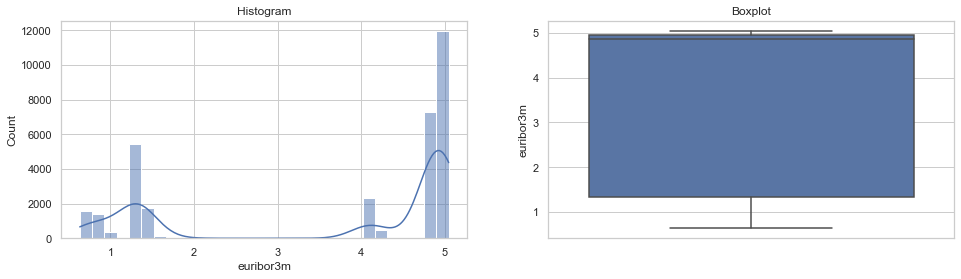

nr.employed
Skew: -1.037974640800726

Highly Skewed


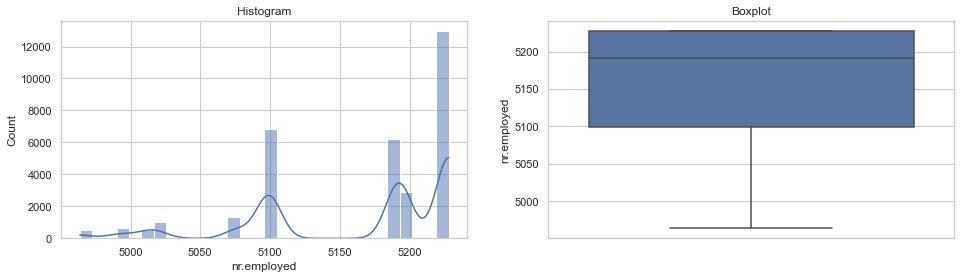

In [2230]:
skewed_features(X_train, num_column)

Hasil yang didapat berupa, ternyata distribusi data dari datasetnya beragam. 

Permasalahan disini adalah, pada dataset yang digunakan, terdapat kolom dengan tipe data kategorikal yang numerik atau nominal numerik. sehingga sebarannya tentu menyebabkan outlier pada dataset. 

---

### Normal Distributed 

Cek outlier pada normal distributed data

In [2231]:
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()
    
    return upper_boundary, lower_boundary

In [2232]:
def norm_bound (X_train, column):
    upper_boundary, lower_boundary = find_normal_boundaries(X_train, column)
    

    print(upper_boundary, lower_boundary)
    print('(right end outliers) : {}'.format(len(X_train[X_train[column] > upper_boundary])))
    print('(left end outliers)  : {}'.format(len(X_train[X_train[column] < lower_boundary])))
    print('% of higher than upper : {}'.format(len(X_train[X_train[column] > upper_boundary]) / len(X_train) * 100))
    print('% of lower than lower : {}'.format(len(X_train[X_train[column] < lower_boundary]) / len(X_train) * 100))
    print('total outliers : {}'.format(len(X_train[X_train[column] > upper_boundary]) / len(X_train) * 100 + len(X_train[X_train[column] < lower_boundary]) / len(X_train) * 100))
    

In [2233]:
norm_bound(X_train, 'cons.conf.idx')

-26.58657725330179 -54.41425451161056
(right end outliers) : 0
(left end outliers)  : 0
% of higher than upper : 0.0
% of lower than lower : 0.0
total outliers : 0.0


In [2234]:
norm_bound(X_train, 'cons.price.idx')

95.31080621762973 91.8375454914439
(right end outliers) : 0
(left end outliers)  : 0
% of higher than upper : 0.0
% of lower than lower : 0.0
total outliers : 0.0


Terdapat kolom yang memiliki distribusi Normal, namun setelah dilihat pada visualisasi boxplotnya, tidak terdapat outlier atau outliernya sedikit. maka dari itu kita akan abaikan handling pada normal distributed. 

---

### Skew Distributed

Cek distribusi skew outlier

In [2235]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

karena terdapat kolom dengan tipe data kategorikal yang numerik atau nominal numerik. sehingga sebarannya tentu menyebabkan outlier pada dataset. Highly Skewed (postive, and negative)

Untuk kolom age, karena age merupakan sesuatu yang natural, range outlier pada kolom ini akan dibiarkan.

----

## Missing Value

**Kita akan bersihkan missing value dari data train-test set**

In [2236]:
X_train.shape

(32942, 20)

In [2237]:
y_train.shape

(32942,)

In [2238]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40416,24,admin.,single,university.degree,0.0,0.0,0.0,cellular,aug,fri,744,1,999,2,failure,-1.7,94.027,-38.3,0.905,4991.6
12935,23,entrepreneur,married,professional.course,0.0,0.0,0.0,cellular,jul,tue,58,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
34,54,blue-collar,divorced,basic.4y,0.0,0.0,0.0,telephone,may,mon,208,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
40373,18,student,single,NaN,0.0,1.0,1.0,telephone,aug,wed,297,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6
38968,48,management,married,university.degree,0.0,1.0,0.0,cellular,dec,fri,377,5,999,1,failure,-3.0,92.713,-33.0,0.718,5023.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,78,retired,married,basic.4y,0.0,1.0,0.0,telephone,apr,tue,137,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
22650,35,technician,single,professional.course,0.0,0.0,1.0,cellular,aug,fri,30,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
11990,44,blue-collar,married,basic.9y,NaN,1.0,0.0,telephone,jun,wed,103,5,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1
26099,52,entrepreneur,married,university.degree,NaN,1.0,1.0,telephone,nov,wed,248,3,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


**Cek numerical missing value**

**Train set**

In [2239]:
miss_num = X_train[num_column].isnull().sum()
print(miss_num)

age                  0
default           6887
housing            795
loan               795
duration             0
campaign             0
pdays                0
previous             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64


beberapa kolom yang memiliki missing value pada dataset : 

default, missing values sebesar **6887** <br>
housung, sebesar **795**<br>
loan, sebesar **795**<br>



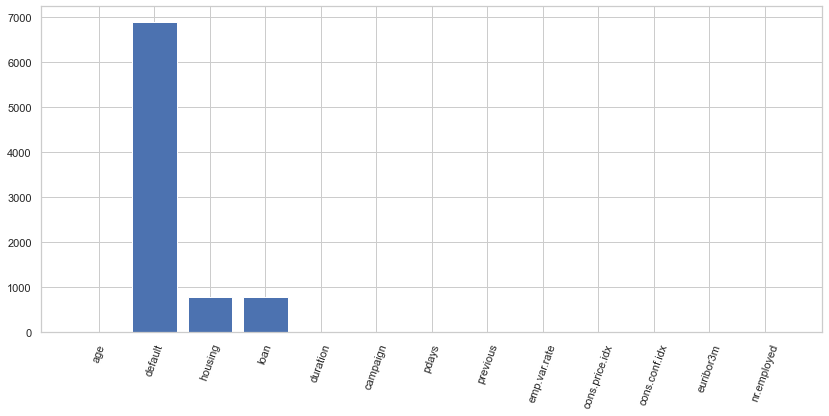

In [2240]:
plt.figure(figsize=(14,6))
plt.bar(miss_num.index,miss_num.values)
plt.xticks(rotation=70)
plt.show()

Karena missing value yang ada kolom default, lebih dari 5% dari total dataset yang ada. maka dari itu perlu kita handling missing value tersebut agar tidak menganggu proses pembelajaran pada machine learning yang akan kita buat.

1 Hal yang perlu diperhatikan adalah, karena missing value yang kita punya(pada visualisasi) merupakan data kategorikal yang di replace dengan numerikal, akan kita asumsikan saja bahwa data tersebut merupakan kolom yang independent, thus kita akan handling dengan cara handling Missng Value pada MCAR.
metode yang akan kita gunakan inputasi(nilai terbanyak) 

**Test set**

In [2241]:
miss_numte = X_test[num_column].isnull().sum()
print(miss_numte)

age                  0
default           1708
housing            195
loan               195
duration             0
campaign             0
pdays                0
previous             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64


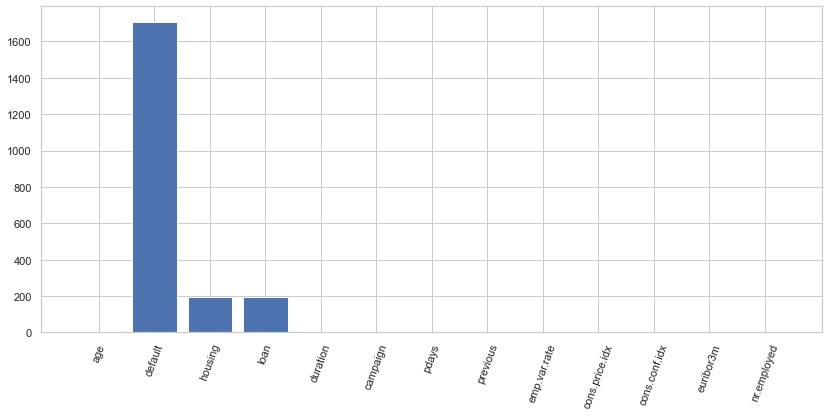

In [2242]:
plt.figure(figsize=(14,6))
plt.bar(miss_numte.index,miss_numte.values)
plt.xticks(rotation=70)
plt.show()

Kita akan handling missing value pada X_test sama dengan X_train, maka kita akan lakukan inputasi pada missing value ini

---

**Cek objek missing value**

**Train set**

In [2243]:
miss_obj = X_train[obj_column].isnull().sum()
print(miss_obj)

job             270
marital          65
education      1406
contact           0
month             0
day_of_week       0
poutcome          0
dtype: int64


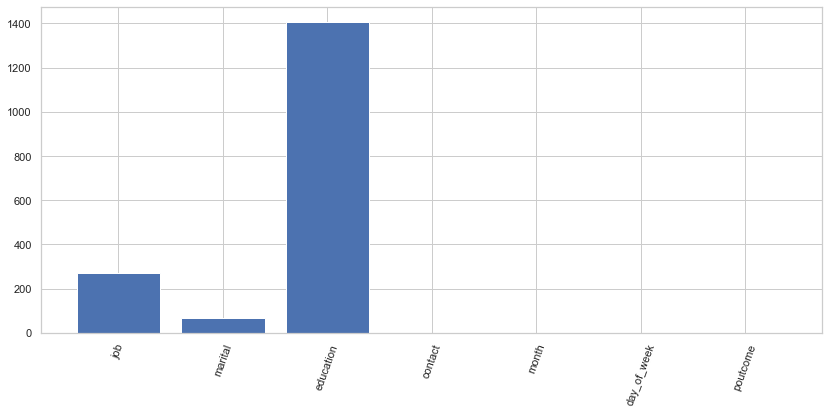

In [2244]:
plt.figure(figsize=(14,6))
plt.bar(miss_obj.index,miss_obj.values)
plt.xticks(rotation=70)
plt.show()

Untuk mising value pada kolom yang memiliki tipe data objek(kategorikal), jika dilihat dari jumlah mising valuenya yang kurang dari 5% bisa kita Abaikan/drop 

---

**Test set**

In [2245]:
miss_objte = X_test[obj_column].isnull().sum()
print(miss_objte)

job             60
marital         15
education      323
contact          0
month            0
day_of_week      0
poutcome         0
dtype: int64


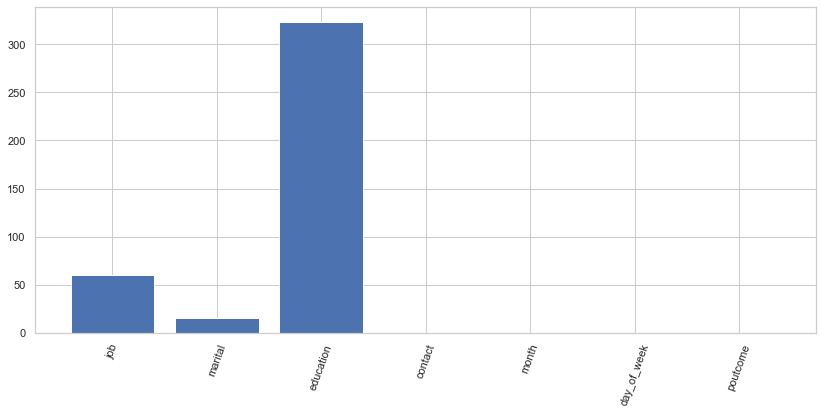

In [2246]:
plt.figure(figsize=(14,6))
plt.bar(miss_objte.index,miss_objte.values)
plt.xticks(rotation=70)
plt.show()

Kita akan handling missing value pada X_test sama dengan X_train, maka kita akan Abaikan/drop pada missing value ini

----

#### **Imputation**

**Train set**

In [2247]:
X_train['default'].fillna(X_train['default'].mode()[0], inplace=True)
X_train['housing'].fillna(X_train['housing'].mode()[0], inplace=True)
X_train['loan'].fillna(X_train['loan'].mode()[0], inplace=True)

In [2248]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40416,24,admin.,single,university.degree,0.0,0.0,0.0,cellular,aug,fri,744,1,999,2,failure,-1.7,94.027,-38.3,0.905,4991.6
12935,23,entrepreneur,married,professional.course,0.0,0.0,0.0,cellular,jul,tue,58,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
34,54,blue-collar,divorced,basic.4y,0.0,0.0,0.0,telephone,may,mon,208,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
40373,18,student,single,NaN,0.0,1.0,1.0,telephone,aug,wed,297,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6
38968,48,management,married,university.degree,0.0,1.0,0.0,cellular,dec,fri,377,5,999,1,failure,-3.0,92.713,-33.0,0.718,5023.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,78,retired,married,basic.4y,0.0,1.0,0.0,telephone,apr,tue,137,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
22650,35,technician,single,professional.course,0.0,0.0,1.0,cellular,aug,fri,30,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
11990,44,blue-collar,married,basic.9y,0.0,1.0,0.0,telephone,jun,wed,103,5,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1
26099,52,entrepreneur,married,university.degree,0.0,1.0,1.0,telephone,nov,wed,248,3,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


**Test set**

In [2249]:
X_test['default'].fillna(X_test['default'].mode()[0], inplace=True)
X_test['housing'].fillna(X_test['housing'].mode()[0], inplace=True)
X_test['loan'].fillna(X_test['loan'].mode()[0], inplace=True)

In [2250]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1727,33,technician,married,professional.course,0.0,0.0,0.0,telephone,may,fri,205,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
16053,35,blue-collar,married,NaN,0.0,0.0,0.0,cellular,jul,tue,560,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
27103,50,management,divorced,university.degree,0.0,1.0,0.0,cellular,nov,fri,183,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8
1473,60,entrepreneur,married,basic.4y,0.0,0.0,0.0,telephone,may,thu,71,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2930,23,services,single,high.school,0.0,0.0,0.0,telephone,may,wed,354,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,53,services,divorced,basic.9y,0.0,1.0,0.0,cellular,jul,fri,121,2,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1
32180,29,blue-collar,married,basic.9y,0.0,0.0,0.0,cellular,may,fri,851,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
27390,49,admin.,married,NaN,0.0,0.0,0.0,cellular,nov,fri,288,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8
13335,30,blue-collar,married,basic.9y,0.0,1.0,0.0,cellular,jul,wed,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


----

**Trim Misisng Value pada dataset** 

In [2251]:
#drop missing value dari train set
Xtrain = pd.concat([X_train, y_train], axis=1, join='inner')
Xtrain = Xtrain.dropna()

y_train = Xtrain['target']
X_train = Xtrain.loc[:, Xtrain.columns != 'target']


In [2252]:
#drop missing value dari test set
Xtest = pd.concat([X_test, y_test], axis=1, join='inner')
Xtest = Xtest.dropna()

y_test = Xtest['target']
X_test = Xtest.loc[:, Xtest.columns != 'target']

In [2253]:
print(X_train.shape, X_test.shape)

(31317, 20) (7866, 20)


In [2254]:
print(y_train.shape, y_test.shape)

(31317,) (7866,)


Data telah dibersihkan dan siap untuk diseleksi feature yang akan digunakan

---

#### **SMOTE**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='target', ylabel='count'>

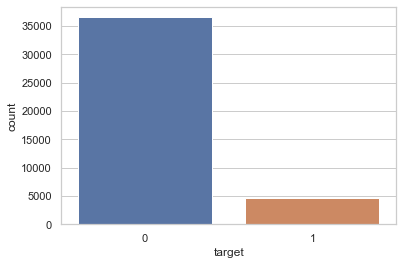

In [2255]:
sns.countplot(df_cop["target"])

Jika kita lihat persebaran datanya, ternyata kita mendapatkan data yang imbalance. (**0 merupkana class No, 1 merupakan class Yes**). hal ini akan mempengaruhi proses pembelajaran pada model machine learning kita. maka dari itu, akan kita berlakukan **Oversampling** 

In [2256]:
smote_nc = SMOTEN(sampling_strategy=str('all'))
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

In [2257]:
print(X_train.shape, y_train.shape)

(55658, 20) (55658,)


----

## Feature Selection

**Pada tahapan ini kita akan pilih Feature yang akan dijadikan sebagai feature pembelajaran untuk model machine learning** 

---

Objek penyelesaian kasus ini adalah, dibuatnya model machine learning yang mampu memprediksi apakah seseorang akan menerima tawaran untuk menggunakan term-deposit atau tidak. Maka dari itu, Target feature yang akan kita gunakan pada kasus ini adalah **target**

---

In [2258]:
#kelompokan data berdasarkan tipe data
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
obj_columns = X_train.select_dtypes(include=['object']).columns.tolist()

Kita akan pisahkan train test ke dalam masing masing fungsi variable. Numerik untuk data bertipe Numerik, dan Obj untuk data yang bertipe kategori Object 

In [2259]:
#buat variabel untuk cek korelasi pada heatmap
corr_train = pd.concat([X_train,y_train],axis=1).corr()

Variabel untuk cek korelasi tiap feature

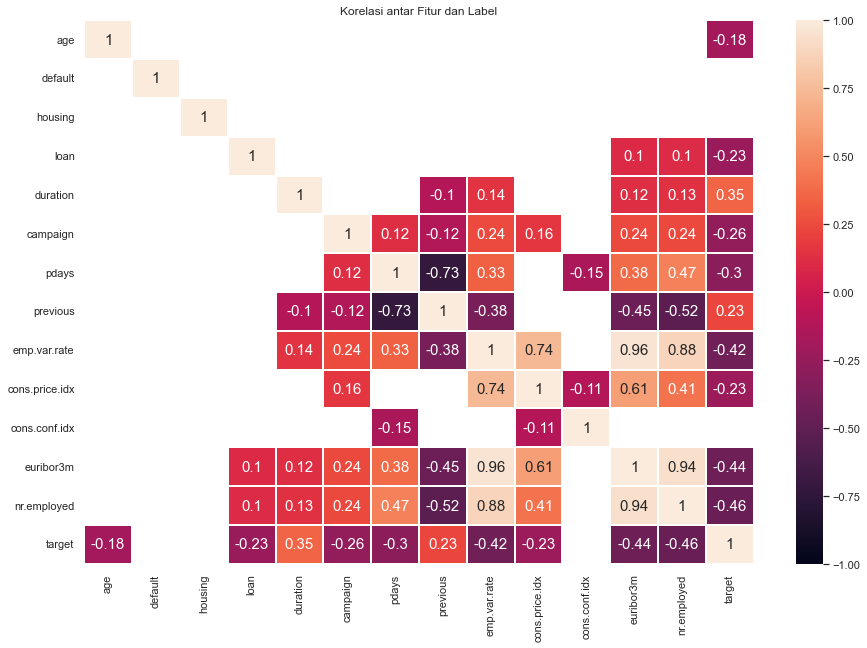

In [2260]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.heatmap(corr_train[(corr_train >= 0.1) | (corr_train <= -0.1)],
            vmax=1.0, vmin=-1.0, linewidths=0.3,
           annot=True, annot_kws={"size": 15}, square=False)
plt.title('Korelasi antar Fitur dan Label')
plt.show()

Dari hasil cek korelasi menggunakan metode pearson, kita dapatkan hasil bahwa ternyata hampir semua kolom berkorelasi dengan Target. Karena banyaknya feature yang berkorelasi, bisa kita simpulkan bahwa penggunaan antara feature dengan target, memiliki sinergi yang sama. meskipun nilainya cukup kecil.

---

In [2261]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,24,admin.,single,university.degree,0.0,0.0,0.0,cellular,aug,fri,744,1,999,2,failure,-1.7,94.027,-38.3,0.905,4991.6
1,23,entrepreneur,married,professional.course,0.0,0.0,0.0,cellular,jul,tue,58,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
2,54,blue-collar,divorced,basic.4y,0.0,0.0,0.0,telephone,may,mon,208,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,48,management,married,university.degree,0.0,1.0,0.0,cellular,dec,fri,377,5,999,1,failure,-3.0,92.713,-33.0,0.718,5023.5
4,42,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,304,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55653,33,admin.,married,high.school,0.0,0.0,0.0,cellular,apr,fri,476,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
55654,33,admin.,married,university.degree,0.0,0.0,0.0,cellular,sep,thu,173,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6
55655,31,admin.,married,university.degree,0.0,1.0,0.0,cellular,may,mon,226,1,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1
55656,32,technician,married,high.school,0.0,0.0,0.0,cellular,aug,mon,663,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1


**Feature Importance**

In [2262]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_train[num_columns], y_train)
for name, score in zip(X_train, rnd_clf.feature_importances_):
    print(name, score)

age 0.1224723635853347
job 1.7441022486623257e-07
marital 0.012577737668357188
education 0.02141026687411473
default 0.3720163360430782
housing 0.054578898767177274
loan 0.02388602471002293
contact 0.012971318350743572
month 0.06051658068083572
day_of_week 0.03191012967274147
duration 0.03875440365130286
campaign 0.16076171820291107
pdays 0.08814404738315547


In [2263]:
rnd_clf.feature_importances_

array([1.22472364e-01, 1.74410225e-07, 1.25777377e-02, 2.14102669e-02,
       3.72016336e-01, 5.45788988e-02, 2.38860247e-02, 1.29713184e-02,
       6.05165807e-02, 3.19101297e-02, 3.87544037e-02, 1.60761718e-01,
       8.81440474e-02])

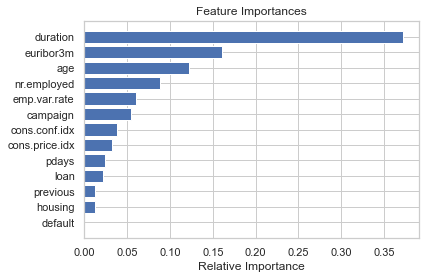

In [2264]:
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [num_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Jika dilihat berdasarkan feature importance, dapat diambil kesimpulan bahwa duration memiliki peranan penting terhadap prediksi 'target'. begitu juga dengan feature selanjutnya 

Untuk pemilihan fitur akan kita gunakan kombinasi berdasarkan korelasi dengan pearson, dan feature importance yang sudah kita buat. <br>
feature yang akan kita gunakan : <br>
***duration*** <br>
***euribor3m***<br>
***age***<br>
**nr.employed**<br>
***emp.var.rate***<br>
***campaign***<br>
***cons.conf.idx***<br>
***cons.price.idx***<br>
***loans.*** <br>
untuk feature diatas dipilih karena mempunyai nilai dan korelasi yang cukup sehingga bisa digunakan.

Adapun kategorikal kolom yang akan digunakan<br>
***poutcome***<br>
***contact***<br>
***marital*** <br>
***education***<br>
feature diatas dipilih karena ada kemungkinan poutcome yang berupa ordinal kategori dan contact kategori nominal yang memiliki keterkaitan apakah seseorang memutuskan untuk menerima tawaran untuk membuat term-deposit. 
untuk marital dan education personal judgement dari saya, mungkin jika seseorang yang menikah dan ingin mempunyai saving untuk anak atau mungkin saat retirement nanti, setidaknya mempertimbangkan untuk memakai term-deposit agar uangnya aman tidak digunakan sampai jangka waktu tersebut. 

----

**Drop Feature yang tidak diperlukan**

In [2265]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,24,admin.,single,university.degree,0.0,0.0,0.0,cellular,aug,fri,744,1,999,2,failure,-1.7,94.027,-38.3,0.905,4991.6
1,23,entrepreneur,married,professional.course,0.0,0.0,0.0,cellular,jul,tue,58,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
2,54,blue-collar,divorced,basic.4y,0.0,0.0,0.0,telephone,may,mon,208,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,48,management,married,university.degree,0.0,1.0,0.0,cellular,dec,fri,377,5,999,1,failure,-3.0,92.713,-33.0,0.718,5023.5
4,42,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,304,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55653,33,admin.,married,high.school,0.0,0.0,0.0,cellular,apr,fri,476,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
55654,33,admin.,married,university.degree,0.0,0.0,0.0,cellular,sep,thu,173,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6
55655,31,admin.,married,university.degree,0.0,1.0,0.0,cellular,may,mon,226,1,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1
55656,32,technician,married,high.school,0.0,0.0,0.0,cellular,aug,mon,663,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1


In [2266]:
X_train = X_train.drop(['pdays','month','day_of_week', 'job', 'previous','housing','default'] , axis=1)

Asumsi dari penulis, karena month dan day_of_week itu tidak memiliki korelasi dengan target. feature tersebut akan kita drop. (alasan month&days_of_week tidak digunakan adalah, karena ini hanya nama hari serta bulan saat data direcord, hal ini tidak mempengaruhi seseorang menerima tawaran untuk menggunakan term-deposit atau tidak, selain itu, terjadinya pun sangat random) <br>
**Pada bagian yang ini saya Highlight adalah feature 'pdays' karena feature ini yang menurut saya sebarannya sangat random dan mengingat pada EDA, mostly value yang ada pada pdays ini memusat pada kolom valuenya '999' = No, oleh karena itu, kolom ini akan saya drop dan tidak saya gunakan.**

In [2267]:
X_train

,age,marital,education,loan,contact,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,24,single,university.degree,0.0,cellular,744,1,failure,-1.7,94.027,-38.3,0.905,4991.6
1,23,married,professional.course,0.0,cellular,58,1,nonexistent,1.4,93.918,-42.7,4.962,5228.1
2,54,divorced,basic.4y,0.0,telephone,208,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,48,married,university.degree,0.0,cellular,377,5,failure,-3.0,92.713,-33.0,0.718,5023.5
4,42,married,high.school,0.0,telephone,304,4,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55653,33,married,high.school,0.0,cellular,476,1,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
55654,33,married,university.degree,0.0,cellular,173,1,nonexistent,-1.1,94.199,-37.5,0.879,4963.6
55655,31,married,university.degree,0.0,cellular,226,1,nonexistent,-1.8,92.893,-46.2,1.354,5099.1
55656,32,married,high.school,0.0,cellular,663,2,nonexistent,1.4,93.444,-36.1,4.966,5228.1


In [2268]:
X_test = X_test.drop(['pdays','month','day_of_week', 'job', 'previous','housing','default'] , axis=1)

In [2269]:
X_test

,age,marital,education,loan,contact,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1727,33,married,professional.course,0.0,telephone,205,1,nonexistent,1.1,93.994,-36.4,4.855,5191.0
27103,50,divorced,university.degree,0.0,cellular,183,1,failure,-0.1,93.200,-42.0,4.021,5195.8
1473,60,married,basic.4y,0.0,telephone,71,2,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2930,23,single,high.school,0.0,telephone,354,1,nonexistent,1.1,93.994,-36.4,4.859,5191.0
11345,55,married,university.degree,0.0,telephone,1012,1,nonexistent,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483,53,married,professional.course,0.0,telephone,264,1,nonexistent,1.1,93.994,-36.4,4.864,5191.0
15305,53,divorced,basic.9y,0.0,cellular,121,2,nonexistent,1.4,93.918,-42.7,4.957,5228.1
32180,29,married,basic.9y,0.0,cellular,851,1,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
13335,30,married,basic.9y,0.0,cellular,219,1,nonexistent,1.4,93.918,-42.7,4.962,5228.1


## Feature Scalling

**Agar tidak bias model machine learning kita, maka kita lakukan feature scalling**

----

In [2270]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
num_columnstest = X_test.select_dtypes(include=np.number).columns.tolist()


print('Numerical Columns : ', num_columns)
print('Numerical Columns : ', num_columnstest)

Numerical Columns :  ['age', 'loan', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Numerical Columns :  ['age', 'loan', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [2271]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train[num_columns]


X_test_num = X_test[num_columnstest]

print('X_train_num : ', X_train_num.shape)
print('X_test_num : ', X_test_num.shape)

X_train_num :  (55658, 9)
X_test_num :  (7866, 9)


Kita akan pisahkan train test ke dalam masing masing fungsi variable. Numerik untuk data bertipe Numerik, dan Obj untuk data yang bertipe kategori Object 

In [2272]:
X_test_num

,age,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1727,33,0.0,205,1,1.1,93.994,-36.4,4.855,5191.0
27103,50,0.0,183,1,-0.1,93.200,-42.0,4.021,5195.8
1473,60,0.0,71,2,1.1,93.994,-36.4,4.855,5191.0
2930,23,0.0,354,1,1.1,93.994,-36.4,4.859,5191.0
11345,55,0.0,1012,1,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...
7483,53,0.0,264,1,1.1,93.994,-36.4,4.864,5191.0
15305,53,0.0,121,2,1.4,93.918,-42.7,4.957,5228.1
32180,29,0.0,851,1,-1.8,92.893,-46.2,1.313,5099.1
13335,30,0.0,219,1,1.4,93.918,-42.7,4.962,5228.1


In [2273]:
X_train_num

,age,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,24,0.0,744,1,-1.7,94.027,-38.3,0.905,4991.6
1,23,0.0,58,1,1.4,93.918,-42.7,4.962,5228.1
2,54,0.0,208,1,1.1,93.994,-36.4,4.857,5191.0
3,48,0.0,377,5,-3.0,92.713,-33.0,0.718,5023.5
4,42,0.0,304,4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
55653,33,0.0,476,1,-1.8,93.075,-47.1,1.405,5099.1
55654,33,0.0,173,1,-1.1,94.199,-37.5,0.879,4963.6
55655,31,0.0,226,1,-1.8,92.893,-46.2,1.354,5099.1
55656,32,0.0,663,2,1.4,93.444,-36.1,4.966,5228.1


---

In [2274]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [2275]:
X_train_num_scaled.shape

(55658, 9)

In [2276]:
X_test_num_scaled.shape

(7866, 9)

In [2277]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

In [2278]:
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

Kita akan gunakan MinMaxScaler pada feature scaling karena metode ini mempertahankan original distribusi data, sehingga tidak mengurangi importance of outliers **(tidak bias terhadap outlier)** 

Meskipun outliers Dari train-set tadi kita bersihkan, masih terdapat feature yang tidak kita bersihkan outliernya(pada test-set) 

---

## Feature Encoding

Karena ada perbedaan jenis tipe data kategorikal, kita akan pisahkan lalu encoding dengan cara masing masing tipe kategorikal 

**Ordinal :** <br>
education 

**Nominal :** <br>
contact<br>
marital<br>
poutcome<br>

----

**Nominal Kategori Encoding** 

Kita gunakan Feature One Hot Encoding karena, data kategori yang kita terima **tidak bersifat Ordinal** dimana tidak ada ordering secara intrinsik pada data. Maka dari itu kita gunakan Cara untuk Data bertipe Kategori Nominal.

In [2279]:
X_train_nom = X_train[['marital','contact']]
X_test_nom = X_test[['marital','contact']]

In [2280]:
X_train_nom

,marital,contact
0,single,cellular
1,married,cellular
2,divorced,telephone
3,married,cellular
4,married,telephone
...,...,...
55653,married,cellular
55654,married,cellular
55655,married,cellular
55656,married,cellular


In [2281]:
X_test_nom

,marital,contact
1727,married,telephone
27103,divorced,cellular
1473,married,telephone
2930,single,telephone
11345,married,telephone
...,...,...
7483,married,telephone
15305,divorced,cellular
32180,married,cellular
13335,married,cellular


In [2282]:
# Feature Encoding using One hot encoding
encoder = OneHotEncoder()

X_train_nom_enc = encoder.fit_transform(X_train_nom).toarray()
X_test_nom_enc = encoder.transform(X_test_nom).toarray()

In [2283]:
encoder.categories_

[array(['divorced', 'married', 'single'], dtype=object),
 array(['cellular', 'telephone'], dtype=object)]

In [2284]:
X_train_nom_encend = pd.DataFrame(X_train_nom_enc, columns=[str(i) for i in range(X_train_nom_enc.shape[1])])
X_train_nom_encend.columns = encoder.get_feature_names_out()
X_train_nom_encend

,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
55653,0.0,1.0,0.0,1.0,0.0
55654,0.0,1.0,0.0,1.0,0.0
55655,0.0,1.0,0.0,1.0,0.0
55656,0.0,1.0,0.0,1.0,0.0


In [2285]:
X_test_nom_encend = pd.DataFrame(X_test_nom_enc, columns=[str(i) for i in range(X_test_nom_enc.shape[1])])
X_test_nom_encend.columns = encoder.get_feature_names_out()
X_test_nom_encend

,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
7861,0.0,1.0,0.0,0.0,1.0
7862,1.0,0.0,0.0,1.0,0.0
7863,0.0,1.0,0.0,1.0,0.0
7864,0.0,1.0,0.0,1.0,0.0


**Ordinal Kategori Encoding**

Kita gunakan Ordinal Encoder untuk tipe data Kategori Ordinal 

In [2286]:
dict2 = [{'col' : 'poutcome', 'mapping' : {'failure' : 0, 'success' : 2, 'other' : 1}},
         {'col': 'education', 'mapping': {'illiterate' :  1, 'basic.4y' : 2, 'basic.6y' : 3, 'basic.9y' : 4, 'high.school' : 5, 'professional.course' : 6, 'university.degree' : 7, 'unknown' : 8}}]

In [2287]:
X_train_ord = X_train[['poutcome','education']]
X_test_ord = X_test[['poutcome','education']]

inf_enc1 = ce.OrdinalEncoder(cols=[['education','poutcome']], mapping=dict2)

In [2288]:
ord = ce.OrdinalEncoder(cols=[['poutcome','education']], mapping=dict2)

X_train_ord_enc = ord.fit_transform(X_train_ord).to_numpy()
X_test_ord_enc = ord.transform(X_test_ord).to_numpy()

In [2289]:
X_train_ord_enc = pd.DataFrame(X_train_ord_enc, columns=X_train_ord.columns)

In [2290]:
X_test_ord_enc = pd.DataFrame(X_test_ord_enc, columns=X_test_ord.columns)

----

**Setelah kita Encoding semua feature kategorikal tadi, kita concate untuk menjadi 1 kesatuan DataFrame**

In [2291]:
X_train_end = pd.concat([X_train_num_scaled, X_train_nom_encend, X_train_ord_enc], axis=1)
X_train_end

,age,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome,education
0,0.089744,0.0,0.151281,0.000000,0.354167,0.711613,0.523013,0.061437,0.105860,0.0,0.0,1.0,1.0,0.0,0.0,7.0
1,0.076923,0.0,0.011793,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,0.0,1.0,0.0,1.0,0.0,-1.0,6.0
2,0.474359,0.0,0.042294,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,1.0,0.0,0.0,0.0,1.0,-1.0,2.0
3,0.397436,0.0,0.076657,0.072727,0.083333,0.199532,0.744770,0.019043,0.226465,0.0,1.0,0.0,1.0,0.0,0.0,7.0
4,0.320513,0.0,0.061814,0.054545,0.937500,0.698753,0.602510,0.957379,0.859735,0.0,1.0,0.0,0.0,1.0,-1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55653,0.205128,0.0,0.096787,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,0.0,1.0,0.0,1.0,0.0,-1.0,5.0
55654,0.205128,0.0,0.035177,0.000000,0.479167,0.778644,0.556485,0.055543,0.000000,0.0,1.0,0.0,1.0,0.0,-1.0,7.0
55655,0.179487,0.0,0.045954,0.000000,0.333333,0.269680,0.192469,0.163228,0.512287,0.0,1.0,0.0,1.0,0.0,-1.0,7.0
55656,0.192308,0.0,0.134811,0.018182,1.000000,0.484412,0.615063,0.982090,1.000000,0.0,1.0,0.0,1.0,0.0,-1.0,5.0


In [2292]:
X_test_end = pd.concat([X_test_num_scaled, X_test_nom_encend, X_test_ord_enc], axis=1)
X_test_end

,age,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome,education
0,0.205128,0.0,0.041684,0.000000,0.937500,0.698753,0.602510,0.956926,0.859735,0.0,1.0,0.0,0.0,1.0,-1.0,6.0
1,0.423077,0.0,0.037210,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,1.0,0.0,0.0,1.0,0.0,0.0,7.0
2,0.551282,0.0,0.014437,0.018182,0.937500,0.698753,0.602510,0.956926,0.859735,0.0,1.0,0.0,0.0,1.0,-1.0,2.0
3,0.076923,0.0,0.071980,0.000000,0.937500,0.698753,0.602510,0.957833,0.859735,0.0,0.0,1.0,0.0,1.0,-1.0,5.0
4,0.487179,0.0,0.205775,0.000000,1.000000,0.882307,0.376569,0.980957,1.000000,0.0,1.0,0.0,0.0,1.0,-1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,0.461538,0.0,0.053680,0.000000,0.937500,0.698753,0.602510,0.958966,0.859735,0.0,1.0,0.0,0.0,1.0,-1.0,6.0
7862,0.461538,0.0,0.024603,0.018182,1.000000,0.669135,0.338912,0.980050,1.000000,1.0,0.0,0.0,1.0,0.0,-1.0,4.0
7863,0.153846,0.0,0.173038,0.000000,0.333333,0.269680,0.192469,0.153933,0.512287,0.0,1.0,0.0,1.0,0.0,-1.0,4.0
7864,0.166667,0.0,0.044530,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,0.0,1.0,0.0,1.0,0.0,-1.0,4.0


Setelah kita gabungkan, kita punya train-test yang siap untuk dimasukan kedalam model machine learning. 

**X_train -> X_train_end**

**X_test -> X_test_end**

---

# 7. Model Definition

**Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.**

----

#### **Deklarasi Model** 

**LogisticRegression**

In [2293]:
log_reg = LogisticRegression(max_iter=1000)

**SVM Classifier**

In [2294]:
msvc = SVC()

**Decision Tree**

In [2295]:
dt = DecisionTreeClassifier()

**Random Forest**

In [2296]:
rdf = RandomForestClassifier()

**KNN**

In [2297]:
knn = KNeighborsClassifier()

**Naive Bayes**

In [2298]:
nb = GaussianNB()

**Other Algorithm**

In [2299]:
nw = MLPClassifier()

----

# 8. Model Training

**Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.**

---

#### **Base Model** 

##### **Logistic Regression**

In [2300]:
log_reg.fit(X_train_end, y_train) 

LogisticRegression(max_iter=1000)

Kita masukan data train-set kita dan y-train untuk dipelajari oleh model machine learning.

In [2301]:
log_cross_val = cross_val_score(log_reg, 
                                      X_train_end, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Akurasi pada semua CV        : ', log_cross_val)
print('Akurasi Mean CV              : ', log_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', log_cross_val.std())
print('Akurasi Range of Test-Set    : ', (log_cross_val.mean()-log_cross_val.std()) , '-', (log_cross_val.mean()+log_cross_val.std()))

Akurasi pada semua CV        :  [0.82180779 0.83253382 0.83414187]
Akurasi Mean CV              :  0.8294944958025026
Akurasi Standar Deviasi CV   :  0.0054748208811611875
Akurasi Range of Test-Set    :  0.8240196749213414 - 0.8349693166836637


----

##### **SVM C**

In [2302]:
msvc.fit(X_train_end, y_train)

SVC()

Kita masukan data train-set kita dan y-train untuk dipelajari oleh model machine learning.

In [2303]:
svc_cross_val = cross_val_score(msvc, 
                                      X_train_end, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Akurasi pada semua CV        : ', svc_cross_val)
print('Akurasi Mean CV              : ', svc_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', svc_cross_val.std())
print('Akurasi Range of Test-Set    : ', (svc_cross_val.mean()-svc_cross_val.std()) , '-', (svc_cross_val.mean()+svc_cross_val.std()))

Akurasi pada semua CV        :  [0.81288178 0.85582106 0.85204815 0.85347228 0.85230438]
Akurasi Mean CV              :  0.8453055295842576
Akurasi Standar Deviasi CV   :  0.016266642837155055
Akurasi Range of Test-Set    :  0.8290388867471026 - 0.8615721724214127


---

##### **Decision Tree**

In [2304]:
dt.fit(X_train_end, y_train)

DecisionTreeClassifier()

In [2305]:
dt_cross_val = cross_val_score(dt, 
                                      X_train_end, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Akurasi pada semua CV        : ', dt_cross_val)
print('Akurasi Mean CV              : ', dt_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', dt_cross_val.std())
print('Akurasi Range of Test-Set    : ', (dt_cross_val.mean()-dt_cross_val.std()) , '-', (dt_cross_val.mean()+dt_cross_val.std()))

Akurasi pada semua CV        :  [0.76554078 0.95571326 0.95876752 0.95382266 0.95454137]
Akurasi Mean CV              :  0.9176771175714766
Akurasi Standar Deviasi CV   :  0.07608693240999631
Akurasi Range of Test-Set    :  0.8415901851614803 - 0.9937640499814729


##### **Random Forest**

In [2306]:
rdf.fit(X_train_end, y_train)

RandomForestClassifier()

In [2307]:
rdf_cross_val = cross_val_score(rdf, 
                                      X_train_end, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Akurasi pada semua CV        : ', rdf_cross_val)
print('Akurasi Mean CV              : ', rdf_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', rdf_cross_val.std())
print('Akurasi Range of Test-Set    : ', (rdf_cross_val.mean()-rdf_cross_val.std()) , '-', (rdf_cross_val.mean()+rdf_cross_val.std()))

Akurasi pada semua CV        :  [0.77245778 0.96424722 0.96424722 0.96298625 0.96118947]
Akurasi Mean CV              :  0.9250255870593864
Akurasi Standar Deviasi CV   :  0.0762921318961612
Akurasi Range of Test-Set    :  0.8487334551632252 - 1.0013177189555476


##### **KNN** 

In [2308]:
knn.fit(X_train_end, y_train)

KNeighborsClassifier()

In [2309]:
knn_cross_val = cross_val_score(knn, 
                                      X_train_end, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Akurasi pada semua CV        : ', knn_cross_val)
print('Akurasi Mean CV              : ', knn_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', knn_cross_val.std())
print('Akurasi Range of Test-Set    : ', (knn_cross_val.mean()-knn_cross_val.std()) , '-', (knn_cross_val.mean()+knn_cross_val.std()))

Akurasi pada semua CV        :  [0.81916996 0.9416996  0.94071146 0.94025694 0.9406163 ]
Akurasi Mean CV              :  0.9164908529147844
Akurasi Standar Deviasi CV   :  0.048662797172982934
Akurasi Range of Test-Set    :  0.8678280557418014 - 0.9651536500877673


##### **Naive Bayes**

In [2310]:
nb.fit(X_train_end, y_train)

GaussianNB()

In [2311]:
nb_cross_val = cross_val_score(nb, 
                                      X_train_end, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Akurasi pada semua CV        : ', nb_cross_val)
print('Akurasi Mean CV              : ', nb_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', nb_cross_val.std())
print('Akurasi Range of Test-Set    : ', (nb_cross_val.mean()-nb_cross_val.std()) , '-', (nb_cross_val.mean()+nb_cross_val.std()))

Akurasi pada semua CV        :  [0.72709307 0.77173913 0.77317643 0.77207798 0.77459348]
Akurasi Mean CV              :  0.7637360163754597
Akurasi Standar Deviasi CV   :  0.018348569017107488
Akurasi Range of Test-Set    :  0.7453874473583523 - 0.7820845853925672


##### **MLP - Classifier**

In [2312]:
nw.fit(X_train_end, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

In [2313]:
nw_cross_val = cross_val_score(nw, 
                                      X_train_end, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Akurasi pada semua CV        : ', nw_cross_val)
print('Akurasi Mean CV              : ', nw_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', nw_cross_val.std())
print('Akurasi Range of Test-Set    : ', (nw_cross_val.mean()-nw_cross_val.std()) , '-', (nw_cross_val.mean()+nw_cross_val.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Akurasi pada semua CV        :  [0.8028207  0.90477902 0.89759253 0.90117689 0.89991914]
Akurasi Mean CV              :  0.8812576553366528
Akurasi Standar Deviasi CV   :  0.03928731610031551
Akurasi Range of Test-Set    :  0.8419703392363372 - 0.9205449714369683


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



---

Jika dilihat hasil dari tiap algoritma menggunakan masing-masing baseline modelnya, dapat disimpulkan bahwa **Algoritma Random Forest** memiliki range akurasi pada Train-set **tertinggi** dengan **Range 77%-96%** <br>
Mengetahui hasil tersebut, akan kita **eliminasi** penggunaan algortima yang lain, sehingga kita akan fokuskan **penggunaan Algoritma Random Forest** untuk di *Hyperparameter tunning*, apakah Tingkat akurasinya dapat berubah, atau benar benar mendapat akurasi sebesar 100%. 

----

##### **Model Optimization** 

In [2314]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1500, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2,3,6,9,11,14,17]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 3, 6, 9, 11, 14, 17],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['entropy', 'gini']}

In [2315]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=30,
                                 cv=5, 
                                 random_state=6, 
                                 n_jobs=-1)
rf_randomcv.fit(X_train_end, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 6, 9, 11,
                                                              14, 17],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
            

In [2316]:
rf_randomcv.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [2317]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_

In [2318]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+3, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 5],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 3,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 3],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 500, 
                     rf_randomcv.best_params_['n_estimators'] - 400, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 400, 
                     rf_randomcv.best_params_['n_estimators'] + 500]
}

param_grid

{'criterion': ['entropy'],
 'max_depth': [560],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 4, 6],
 'min_samples_split': [0, 2, 3, 4, 6],
 'n_estimators': [0, 100, 500, 900, 1000]}

In [2319]:
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1)

rf_gridcv.fit(X_train_end, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


135 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater tha

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 4, 6],
                         'min_samples_split': [0, 2, 3, 4, 6],
                         'n_estimators': [0, 100, 500, 900, 1000]})

In [2320]:
# Display Best Hyperparamters from Random Search

rf_randomcv.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [2321]:
# Get Best Hyperparameters

rf_gridcv_best = rf_gridcv.best_estimator_

# 9. Model Evaluation

**Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

---

##### **Evaluasi Random Forest (Best Base Model)**

**Base Model**

***Test-set***

Accuracy - Test Set   :  0.9041444190185609 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      6994
           1       0.56      0.60      0.58       872

    accuracy                           0.90      7866
   macro avg       0.76      0.77      0.76      7866
weighted avg       0.91      0.90      0.91      7866
 

Confusion Matrix      : 


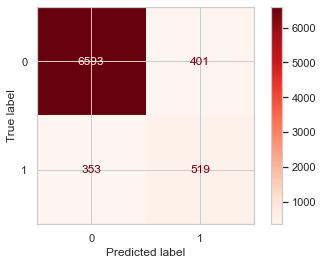

In [2322]:
y_rdf_predict_test = rdf.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_rdf_predict_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_rdf_predict_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rdf, X_test_end, y_test, cmap='Reds'))

Dari hasil penerapan model terhadap data test-set didapatkan hasil : 
+ f1score sebesar 94% apabila class 0 TP 
+ f1score sebesar 56% apabila class 1 TP 

---

**Random Search**

***Train-set***

Accuracy - Train Set   :  0.9996226957490387 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27829
           1       1.00      1.00      1.00     27829

    accuracy                           1.00     55658
   macro avg       1.00      1.00      1.00     55658
weighted avg       1.00      1.00      1.00     55658
 

Confusion Matrix      : 


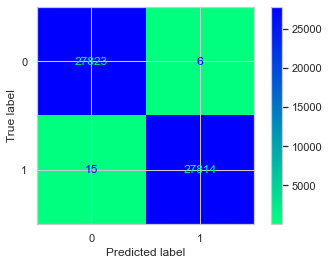

In [2323]:
# Check Performance Model against Train-Set

y_pred_train = rf_randomcv_best.predict(X_train_end)

print('Accuracy - Train Set   : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_train_end, y_train, cmap='winter_r'))

***Test-set***

Accuracy - Test Set   :  0.9023646071700991 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      6994
           1       0.56      0.59      0.57       872

    accuracy                           0.90      7866
   macro avg       0.75      0.77      0.76      7866
weighted avg       0.91      0.90      0.90      7866
 

Confusion Matrix      : 


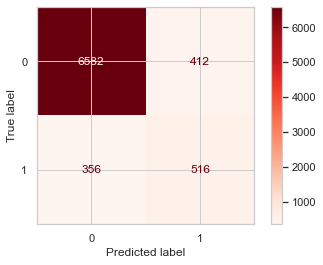

In [2324]:
# Check Performance Model against Test-Set

y_pred_test = rf_randomcv_best.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_end, y_test, cmap='Reds'))

Dari hasil penerapan model terhadap data test-set didapatkan hasil : 
+ f1score sebesar 95% apabila class 0 TP 
+ f1score sebesar 58% apabila class 1 TP 

---

**Optimization berdasarkan Hyperparameter Random Search** 

***Train-set***

Accuracy - Train Set   :  0.999676596356319 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27829
           1       1.00      1.00      1.00     27829

    accuracy                           1.00     55658
   macro avg       1.00      1.00      1.00     55658
weighted avg       1.00      1.00      1.00     55658
 

Confusion Matrix      : 


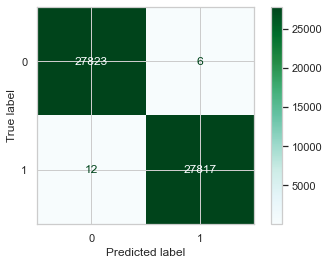

In [2325]:
# Check Performance Model against Train-Set

y_predgcv_train = rf_gridcv_best.predict(X_train_end)

print('Accuracy - Train Set   : ', accuracy_score(y_train, y_predgcv_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_predgcv_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_train_end, y_train, cmap='BuGn'))

***Test-set***

Accuracy - Test Set   :  0.9022374777523519 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      6994
           1       0.55      0.60      0.58       872

    accuracy                           0.90      7866
   macro avg       0.75      0.77      0.76      7866
weighted avg       0.91      0.90      0.90      7866
 

Confusion Matrix      : 


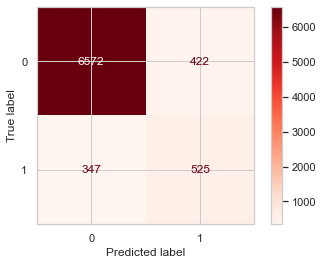

In [2326]:
# Check Performance Model against test-Set

y_predgcv_test = rf_gridcv_best.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_predgcv_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_predgcv_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_end, y_test, cmap='Reds'))

Dari hasil penerapan model terhadap data test-set didapatkan hasil : 
+ f1score sebesar 94% apabila class 0 TP 
+ f1score sebesar 57% apabila class 1 TP 

-----

##### **Evaluasi Model Logistik Regresi**

***Test-set***

Accuracy - Test Set   :  0.8329519450800915 

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6994
           1       0.38      0.81      0.52       872

    accuracy                           0.83      7866
   macro avg       0.68      0.82      0.71      7866
weighted avg       0.91      0.83      0.86      7866

Confusion Matrix      : 


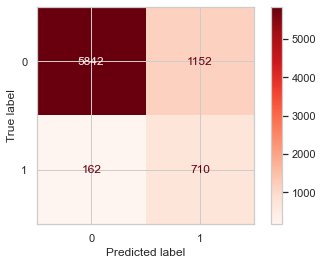

In [2329]:
y_pred_log = log_reg.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_log), '\n')
print(classification_report(y_test, y_pred_log))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_reg, X_test_end, y_test, cmap='Reds'))

##### **Evaluasi Model SVM C** 

Accuracy - Test Set   :  0.8401983218916858 

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6994
           1       0.39      0.81      0.53       872

    accuracy                           0.84      7866
   macro avg       0.68      0.83      0.72      7866
weighted avg       0.91      0.84      0.86      7866

Confusion Matrix      : 


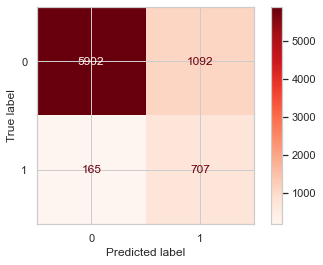

In [2330]:
y_pred_svm = msvc.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_svm), '\n')
print(classification_report(y_test, y_pred_svm))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(msvc, X_test_end, y_test, cmap='Reds'))

##### **Decision Tree**

Accuracy - Test Set   :  0.8820239003305365 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6994
           1       0.47      0.56      0.51       872

    accuracy                           0.88      7866
   macro avg       0.71      0.74      0.72      7866
weighted avg       0.89      0.88      0.89      7866

Confusion Matrix      : 


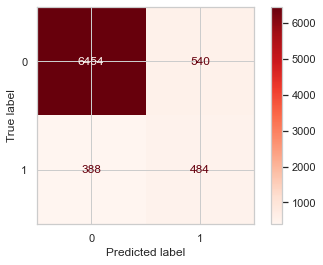

In [2331]:
y_pred_dt = dt.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_dt), '\n')
print(classification_report(y_test, y_pred_dt))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt, X_test_end, y_test, cmap='Reds'))

##### **KNN**

Accuracy - Test Set   :  0.8682939232138317 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      6994
           1       0.43      0.57      0.49       872

    accuracy                           0.87      7866
   macro avg       0.69      0.74      0.71      7866
weighted avg       0.89      0.87      0.88      7866

Confusion Matrix      : 


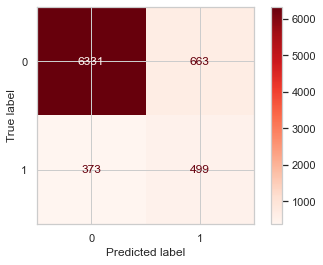

In [2332]:
y_pred_knn = knn.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_knn), '\n')
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test_end, y_test, cmap='Reds'))

##### **Naive Bayes**

Accuracy - Test Set   :  0.7702771421306891 

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      6994
           1       0.28      0.70      0.40       872

    accuracy                           0.77      7866
   macro avg       0.62      0.74      0.63      7866
weighted avg       0.88      0.77      0.81      7866

Confusion Matrix      : 


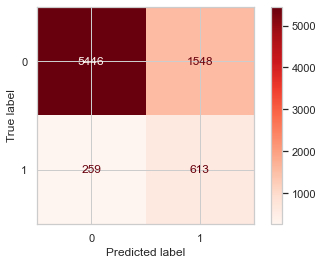

In [2333]:
y_pred_nb = nb.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_nb), '\n')
print(classification_report(y_test, y_pred_nb))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, X_test_end, y_test, cmap='Reds'))

##### **MLP - Classifier**

Accuracy - Test Set   :  0.8731248410882279 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      6994
           1       0.45      0.72      0.56       872

    accuracy                           0.87      7866
   macro avg       0.71      0.81      0.74      7866
weighted avg       0.91      0.87      0.89      7866

Confusion Matrix      : 


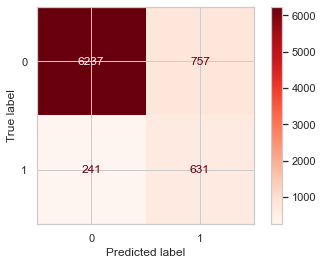

In [2334]:
y_pred_nw = nw.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_nw), '\n')
print(classification_report(y_test, y_pred_nw))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nw, X_test_end, y_test, cmap='Reds'))

---

##### **Summary terhadap Accuracy test - set dari tiap algortma** 

In [2335]:
print('Accuracy - Test Set RDF   : ', accuracy_score(y_test, y_rdf_predict_test), '\n')
print('Accuracy - Test Set Log   : ', accuracy_score(y_test, y_pred_log), '\n')
print('Accuracy - Test Set SVM   : ', accuracy_score(y_test, y_pred_svm), '\n')
print('Accuracy - Test Set DCT   : ', accuracy_score(y_test, y_pred_dt), '\n')
print('Accuracy - Test Set KNN   : ', accuracy_score(y_test, y_pred_knn), '\n')
print('Accuracy - Test Set NVB   : ', accuracy_score(y_test, y_pred_nb), '\n')
print('Accuracy - Test Set MLPC  : ', accuracy_score(y_test, y_pred_nw), '\n')

Accuracy - Test Set RDF   :  0.9041444190185609 

Accuracy - Test Set Log   :  0.8329519450800915 

Accuracy - Test Set SVM   :  0.8401983218916858 

Accuracy - Test Set DCT   :  0.8820239003305365 

Accuracy - Test Set KNN   :  0.8682939232138317 

Accuracy - Test Set NVB   :  0.7702771421306891 

Accuracy - Test Set MLPC  :  0.8731248410882279 



Dari hasil Akurasi pada test set diatas, kita simpulkan bahwa, algoritma dengan base model terbaik untuk penggunaannya pada dataset ini ada pada **Random Forest** 

Selanjutnya akan kita **bandingkan Base model** dari **Random Forest**, dengan **Model** yang **sudah di Hyper parameter tunning**

In [2336]:
print('Accuracy - Test Set (RDF BaseModel)                      : ', accuracy_score(y_test, y_rdf_predict_test), '\n')
print('Accuracy - Test Set (Random Search)                      : ', accuracy_score(y_test, y_pred_test), '\n')
print('Accuracy - Test Set (Tunning Berdasarkan Random Search)  : ', accuracy_score(y_test, y_predgcv_test), '\n')

Accuracy - Test Set (RDF BaseModel)                      :  0.9041444190185609 

Accuracy - Test Set (Random Search)                      :  0.9023646071700991 

Accuracy - Test Set (Tunning Berdasarkan Random Search)  :  0.9022374777523519 



Ternyata dari hasil perbandingannya, untuk **akurasi terbaik ada pada Random Search yang belum di Tunning.** <br>
Tunning pada Random Search meyebabkan akurasi turun, meskipun nilainya sangat kecil.

----

# 10. Model Inference 

**Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.**

----

In [2337]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,42,admin.,single,university.degree,0.0,1.0,0.0,telephone,may,fri,87,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
1,50,technician,divorced,professional.course,0.0,0.0,0.0,cellular,nov,tue,46,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
2,29,blue-collar,single,basic.9y,0.0,1.0,0.0,cellular,may,tue,396,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
3,56,unemployed,divorced,university.degree,NaN,1.0,0.0,telephone,jun,tue,447,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
4,29,technician,single,NaN,0.0,0.0,0.0,telephone,jun,mon,193,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,0
5,46,services,married,basic.9y,NaN,1.0,0.0,cellular,aug,wed,59,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
6,53,technician,divorced,NaN,0.0,1.0,0.0,cellular,may,mon,35,6,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
7,58,technician,divorced,university.degree,0.0,0.0,0.0,cellular,may,thu,101,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,0
8,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,nov,wed,64,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
9,59,retired,married,professional.course,0.0,1.0,0.0,cellular,jun,wed,68,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,0


In [2338]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[obj_columns]

In [2339]:
data_inf_num = data_inf_num.fillna(0)  

In [2340]:
data_inf_cat = data_inf_cat.fillna(data_inf_cat.mode().iloc[0])

In [2341]:
data_inf_cat.drop(['day_of_week', 'month'], axis=1, inplace=True)

Inf Scalling 

In [2342]:
scaler.fit(data_inf_num)

data_inf_num_scaled = scaler.transform(data_inf_num)

In [2343]:
data_inf_num_scaled = pd.DataFrame(data_inf_num_scaled, columns=data_inf_num.columns)
data_inf_num_scaled

,age,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.433333,0.0,0.126214,0.0,0.930233,0.700382,0.970297,0.973118,0.755760
1,0.700000,0.0,0.026699,0.0,0.651163,0.195293,0.415842,0.781989,0.787360
2,0.000000,0.0,0.876214,0.0,0.255814,0.000000,0.000000,0.012634,0.150757
3,0.900000,0.0,1.000000,0.4,1.000000,1.000000,0.435644,0.999194,1.000000
4,0.000000,0.0,0.383495,0.6,1.000000,1.000000,0.435644,0.973387,1.000000
5,0.566667,0.0,0.058252,0.8,1.000000,0.350509,1.000000,1.000000,1.000000
6,0.800000,0.0,0.000000,1.0,0.255814,0.000000,0.000000,0.000000,0.150757
7,0.966667,0.0,0.160194,0.0,0.255814,0.000000,0.000000,0.022312,0.150757
8,0.233333,0.0,0.070388,0.0,0.651163,0.195293,0.415842,0.773118,0.787360
9,1.000000,0.0,0.080097,0.0,0.000000,0.044529,0.534653,0.004301,0.000000


---

Inf Encoding

Kategorikal Nominal

In [2344]:
data_inf_nom = data_inf[['marital','contact']]

In [2345]:
data_inf_nom_enc = encoder.fit_transform(data_inf_nom).toarray()

In [2346]:
data_inf_nom_encend = pd.DataFrame(data_inf_nom_enc, columns=[str(i) for i in range(data_inf_nom_enc.shape[1])])
data_inf_nom_encend.columns = encoder.get_feature_names_out()
data_inf_nom_encend

,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0
9,0.0,1.0,0.0,1.0,0.0


Kategorikal Ordinal 

In [2347]:
data_inf_ord = data_inf[['education','poutcome']]

In [2348]:
inf_enc1 = ce.OrdinalEncoder(cols=[['education','poutcome']], mapping=dict2)

In [2349]:
# inf_enc2 = ce.OrdinalEncoder(cols=['poutcome'], mapping=dict2)

In [2350]:
data_inf_ord_enc1 = inf_enc1.fit_transform(data_inf_ord).to_numpy()

In [2351]:
# data_inf_ord_enc2 = inf_enc2.fit_transform(data_inf_ord).to_numpy()

In [2352]:
data_inf_ord_enc = pd.DataFrame(data_inf_ord_enc1, columns=data_inf_ord.columns)
data_inf_ord_enc

,education,poutcome
0,7.0,-1.0
1,6.0,-1.0
2,4.0,0.0
3,7.0,-1.0
4,-1.0,-1.0
5,4.0,-1.0
6,-1.0,-1.0
7,7.0,0.0
8,7.0,-1.0
9,6.0,-1.0


In [2353]:
data_inf_end = pd.concat([data_inf_num_scaled, data_inf_nom_encend, data_inf_ord_enc], axis=1)
data_inf_end

,age,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,education,poutcome
0,0.433333,0.0,0.126214,0.0,0.930233,0.700382,0.970297,0.973118,0.755760,0.0,0.0,1.0,0.0,1.0,7.0,-1.0
1,0.700000,0.0,0.026699,0.0,0.651163,0.195293,0.415842,0.781989,0.787360,1.0,0.0,0.0,1.0,0.0,6.0,-1.0
2,0.000000,0.0,0.876214,0.0,0.255814,0.000000,0.000000,0.012634,0.150757,0.0,0.0,1.0,1.0,0.0,4.0,0.0
3,0.900000,0.0,1.000000,0.4,1.000000,1.000000,0.435644,0.999194,1.000000,1.0,0.0,0.0,0.0,1.0,7.0,-1.0
4,0.000000,0.0,0.383495,0.6,1.000000,1.000000,0.435644,0.973387,1.000000,0.0,0.0,1.0,0.0,1.0,-1.0,-1.0
5,0.566667,0.0,0.058252,0.8,1.000000,0.350509,1.000000,1.000000,1.000000,0.0,1.0,0.0,1.0,0.0,4.0,-1.0
6,0.800000,0.0,0.000000,1.0,0.255814,0.000000,0.000000,0.000000,0.150757,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0
7,0.966667,0.0,0.160194,0.0,0.255814,0.000000,0.000000,0.022312,0.150757,1.0,0.0,0.0,1.0,0.0,7.0,0.0
8,0.233333,0.0,0.070388,0.0,0.651163,0.195293,0.415842,0.773118,0.787360,0.0,1.0,0.0,1.0,0.0,7.0,-1.0
9,1.000000,0.0,0.080097,0.0,0.000000,0.044529,0.534653,0.004301,0.000000,0.0,1.0,0.0,1.0,0.0,6.0,-1.0


In [2354]:
y_pred_inf = rdf.predict(data_inf_end)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Prediction - Target'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




In [2355]:
pd.concat([data_inf, y_pred_inf], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,Prediction - Target
0,42,admin.,single,university.degree,0.0,1.0,0.0,telephone,may,fri,87,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0,0
1,50,technician,divorced,professional.course,0.0,0.0,0.0,cellular,nov,tue,46,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0,0
2,29,blue-collar,single,basic.9y,0.0,1.0,0.0,cellular,may,tue,396,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0,1
3,56,unemployed,divorced,university.degree,NaN,1.0,0.0,telephone,jun,tue,447,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0
4,29,technician,single,NaN,0.0,0.0,0.0,telephone,jun,mon,193,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,0,0
5,46,services,married,basic.9y,NaN,1.0,0.0,cellular,aug,wed,59,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,0
6,53,technician,divorced,NaN,0.0,1.0,0.0,cellular,may,mon,35,6,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0,0
7,58,technician,divorced,university.degree,0.0,0.0,0.0,cellular,may,thu,101,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,0,1
8,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,nov,wed,64,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,0
9,59,retired,married,professional.course,0.0,1.0,0.0,cellular,jun,wed,68,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,0,1


# 11. Pengambilan Kesimpulan

**Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.**

----

Melalui percobaan yang dilakukan dengan berbagai macam Algortma Machine Learning dibawah ini merupakan hasil Akurasi yang diperoleh : 

### Logistic Regression 

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model logistic regression pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 90%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 52%** 


Akurasi Algoritma Logistik Regression dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 90% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 52% 

---

### SVM C

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model logistic regression pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 90%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 53%** 


Akurasi Algoritma SVM C dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 90% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 53% 

---

### Decision Tree 

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model Decision Tree pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 93%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 51%** 


Akurasi Algoritma Decision Tree dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 93% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 51% 

----

### Random Forest 

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model Random Forest pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 95%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 58%** 


Akurasi Algoritma Random Forest dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 95% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 58% 

---

### KNN

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model KNN pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 92%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 49%** 


Akurasi Algoritma KNN dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 92% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 49% 

---

### Naive Bayes

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model Naive Bayes pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 86%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 40%** 


Akurasi Algoritma Naive Bayes dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 86% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 40% 

---

### Other Algorithm (MLP-Classifier)

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya MLP-Classifier pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 93%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 56%** 


Akurasi Algoritma MLP-Classifier dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 90% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 53% 

---

### Hyperparameter Tunning 

Pada saat proses Training, didapatkan Model dengan akurasi terbaik diantara model yang lainnya yaitu Algoritma Random Forest Classifier dengan nilai Akurasi terhadap Test Set : 0.9041444190185609  Yang kemudian dilakukan Hyperparameter Tunning untuk Optimization Modelnya. 

Hyperparameter Tunning dilakukan dengan menggunakan RandomSearch, yang ternyata Nilai Akurasinya turun meskipun kecil Nilainya. ini membuktikan, dengan default Base Model, Random Forest Classifier dapat menghasilkan F1 Score/Akurasi yang baik dibandingkan dengan Setelah dilakukan Hyperparameter Tunning.

Kemudian dilakukan juga optimization Model dari RandomSearch, apakah nilai akurasinya dapat membaik atau tidak. hasilnya No. Akurasi terbaik tetap ada di Default atau Base Model dari RandomForestnya. 

### After Word

Karena data yang kita olah imbalance (Class 0 serta Class 1 yang memiliki perbedaan jumlah yang cukup jauh) mungkin mempengaruhi hasil dari Akurasi. Jika kita apply SMOTEN pada training, Algoritma Machine Learning yang digunakan mampu memperbaiki prediksi pada class 1. 
Selain itu, Akurasi sendiri dapat dipengaruhi oleh proses preprocessing. Apakah metode yang digunakan tepat, sesuai dengan kebutuhan dari Dataset. Kemungkinan dapat terjadi Kesalahan pada proses preprocessing yang menyebabkan rendahnya nilai akurasi.  

---